<a href="https://colab.research.google.com/github/jesusdangerous/spotify-project/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import itertools


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.4 MB/s eta 0:00:00


In [ ]:
df = pd.read_csv('dataset.csv')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [ ]:
df = df.drop(df.columns[0], axis=1)
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [ ]:
df.isnull().sum()

,0
track_id,0
artists,1
album_name,1
track_name,1
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0
key,0


In [ ]:
i = 0
for artist in df['artists']:
    i += 1
    if not isinstance(artist, str):
        print(artist, i)
df.iloc[65900]

nan 65901


,65900
track_id,1kR4gIb7nGxHPI3D2ifs59
artists,NaN
album_name,NaN
track_name,NaN
popularity,0
duration_ms,0
explicit,False
danceability,0.501
energy,0.583
key,7


In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

,0
track_id,0
artists,0
album_name,0
track_name,0
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0
key,0


In [ ]:
df['explicit'] = df['explicit'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113999 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        113999 non-null  int64  
 5   duration_ms       113999 non-null  int64  
 6   explicit          113999 non-null  int64  
 7   danceability      113999 non-null  float64
 8   energy            113999 non-null  float64
 9   key               113999 non-null  int64  
 10  loudness          113999 non-null  float64
 11  mode              113999 non-null  int64  
 12  speechiness       113999 non-null  float64
 13  acousticness      113999 non-null  float64
 14  instrumentalness  113999 non-null  float64
 15  liveness          113999 non-null  float64
 16  valence           113999 

<ipython-input-10-c48ebb20ef46>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['explicit'] = df['explicit'].astype('int64')


In [ ]:
sns.set(style='whitegrid')
colors = ['#ff6600', '#002eef']

palette = {0: colors[0], 1: colors[1]}

## Анализ зависимости критериев: длительность (минуты) и популярность
Получим относительные значения темпа каждого трека по отношению к общему темпу всех треков. Такой подход нужен для анализа музыкальных данных, где важно учитывать вклад каждого трека в общий темп.

In [ ]:
def change_to_min(x):
    return round(x / 60000, 1)

df['duration_ms'] = df['duration_ms'].apply(change_to_min)

df = df.rename(columns={'duration_ms' : 'duration_min'})

<ipython-input-12-f1daee32d5b2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration_ms'] = df['duration_ms'].apply(change_to_min)


In [ ]:
df['duration_min']

,duration_min
0,3.8
1,2.5
2,3.5
3,3.4
4,3.3
...,...
113995,6.4
113996,6.4
113997,4.5
113998,4.7


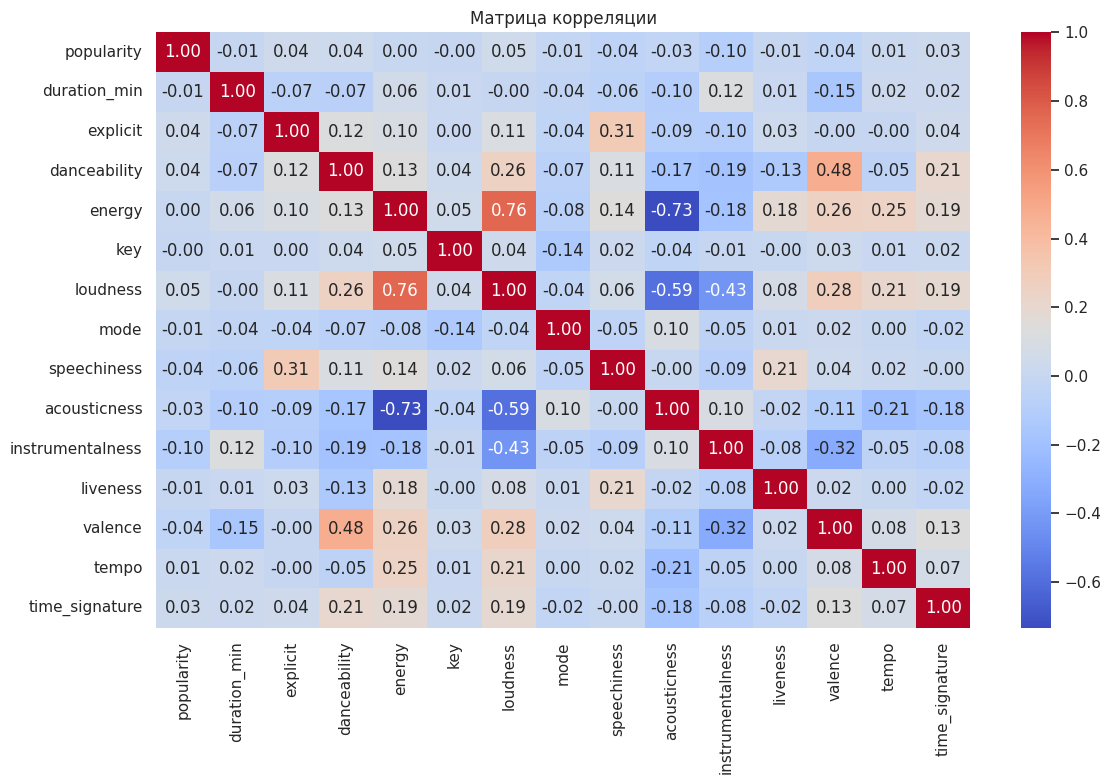

In [ ]:
corr_df = df.loc[:, ['popularity', 'duration_min', 'explicit', 'danceability', 'energy', 'key', 'loudness',
                     'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
                     'valence', 'tempo', 'time_signature']]

corr_df_1 = corr_df.corr()
fix, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(data=corr_df_1, fmt='.2f', annot=True, cmap='coolwarm', ax=ax)

plt.title('Матрица корреляции')
plt.tight_layout()
plt.show()

In [ ]:
corr_popularity = corr_df_1['popularity'][1:]
corr_popularity

,popularity
duration_min,-0.007167
explicit,0.044078
danceability,0.035444
energy,0.001053
key,-0.003847
loudness,0.050420
mode,-0.013948
speechiness,-0.044930
acousticness,-0.025458
instrumentalness,-0.095147


График представляет собой рассеивание точек (scatter plot), где по оси X отображена длительность песен в минутах, а по оси Y — их популярность. На основе этого графика можно сделать следующие выводы:

Короткие песни более популярны:большинство популярных песен (с рейтингом популярности выше 60) имеют длительность менее 10 минут.
Это может быть связано с тем, что слушатели предпочитают короткие треки из-за удобства восприятия, трендов в индустрии.

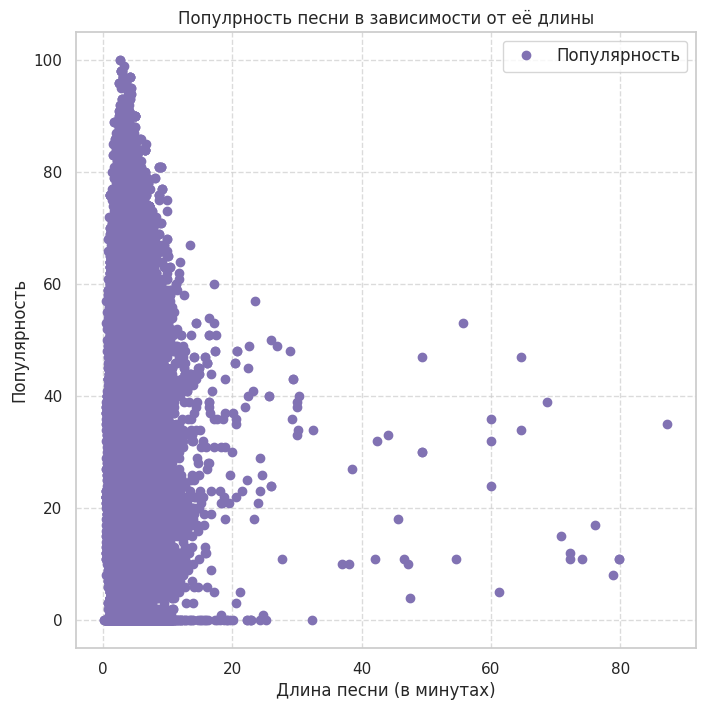

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.set_style('whitegrid')

ax.plot(df['duration_min'], df['popularity'], marker='o', linestyle='', color='m', linewidth=3, label='Популярность')

ax.grid(True, linestyle='--', alpha=0.7)

ax.set_xlabel('Длина песни (в минутах)')
ax.set_ylabel('Популярность')
ax.set_title('Популрность песни в зависимости от её длины')

ax.legend(fontsize=12)
plt.show()

## Анализ зависимости критериев: музыкальная позитивность и популярность
На данном этапе, комнада решили проанализировать как позитивность трека влияет на популярность. Для этого для начала надо найти среднюю позитивность, чтобы в прололжении присвоить конкретнымм трекам значения позитивность или негативность.

In [ ]:
avg_valence = sum([i for i in df['valence']])/len([i for i in  df['valence']])

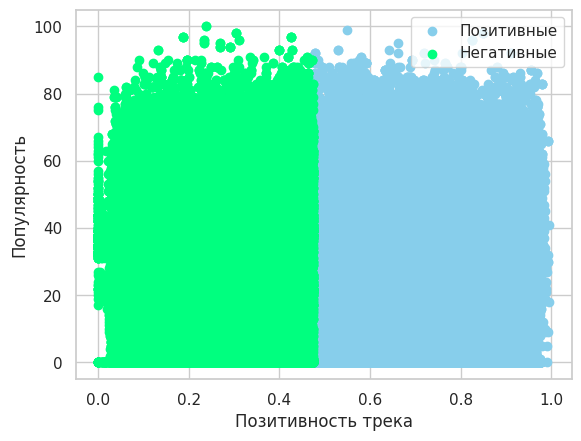

In [ ]:
positive = df[df['valence'] >= avg_valence]
negative = df[df['valence'] <  avg_valence]

plt.scatter(positive['valence'], positive['popularity'], c='skyblue', label='Позитивные')
plt.scatter(negative['valence'], negative['popularity'], c='springgreen', label='Негативные')

plt.legend()

plt.xlabel('Позитивность трека')
plt.ylabel('Популярность')

plt.show()

Как негативные, так и позитивные треки могут быть популярными, что указывает на разнообразие музыкальных вкусов слушателей.
   - Пик популярности (80–100) наблюдается в обеих категориях, но негативные треки имеют более равномерное распределение по популярности.

## Анализ зависимости критериев: откровенность песни и ее популярность.
False - не содержит песня нецензурной лексики
True - содержит песня нецензурной лексики

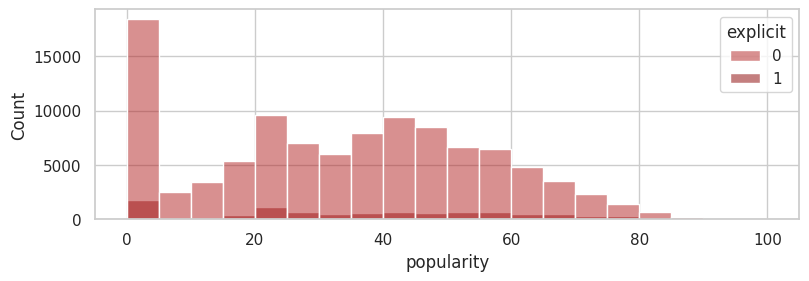

In [ ]:
sns.set(style="whitegrid")
colors=['#B22222', '#8B0000', '#FFB6C1']

palette={False: colors[0], True: colors[1]}
plt.figure(figsize=(20,6))
plt.subplot(2,2,1)
sns.histplot(data=df,
            x='popularity',
            bins = 20, hue='explicit',
             palette=palette,);

Основное распределение: Большинство песен имеют низкую популярность (особенно с популярностью 0).
explicit-категории: Песни без откровенного содержания (False) преобладают, а с откровенным (True) — значительно меньше.
Тренды: Популярность песен растет до уровня 40–50, после чего падает.
Вывод: Большинство треков малоизвестны; откровенные песни менее популярны.

## Анализ зависимости критериев: жанр и популярность
На данном этапе, комнада решили проанализировать какой жанр треков наиболее популярен. Для этого мы подсчитали общую популярность каждого жанра и построим график.

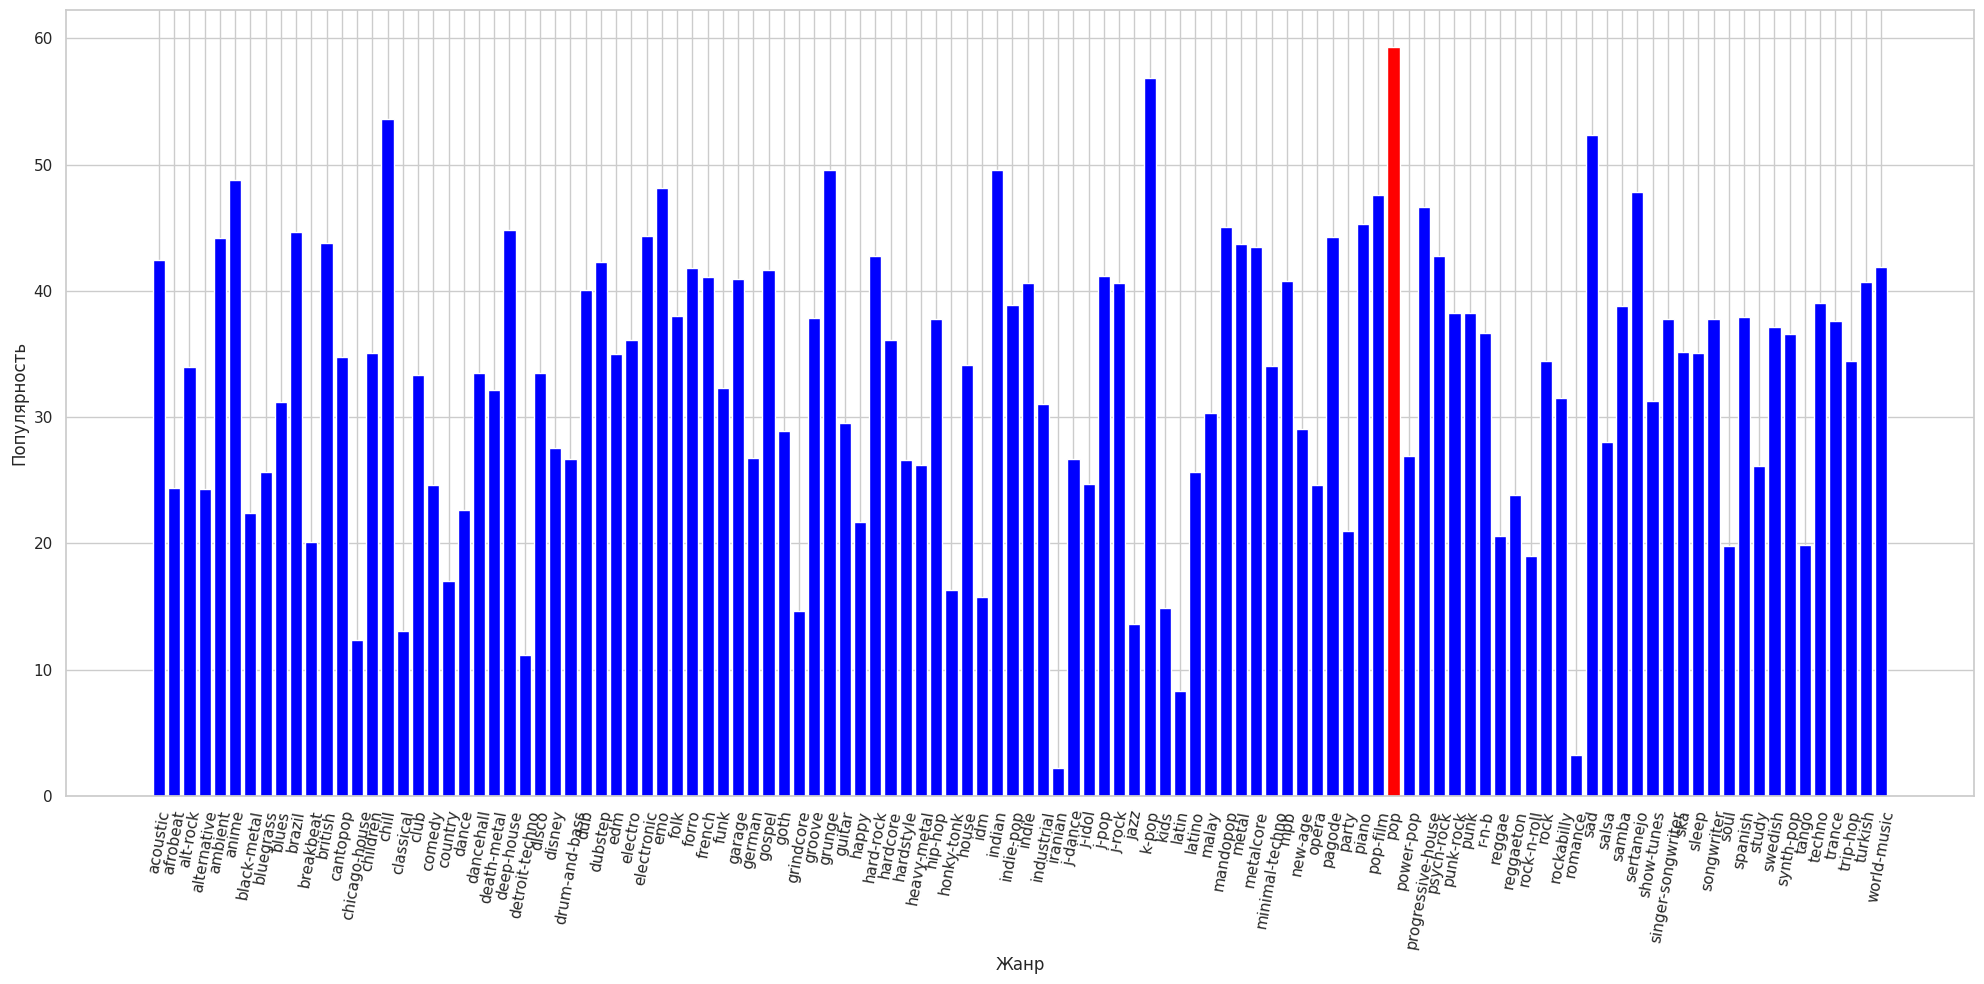

In [ ]:
def fix_elements(element):
    return element/10**3

popularity_and_genre=list(df.groupby('track_genre')['popularity'].sum())
popularity_and_genre=[fix_elements(i) for i in popularity_and_genre]

genres = list(df['track_genre'].unique())

top_indices = popularity_and_genre.index(max(popularity_and_genre))

colors = ['blue'] * len(popularity_and_genre)
colors[top_indices] = 'red'

plt.figure(figsize=(20, 10))
plt.bar(genres, popularity_and_genre, color=colors)

plt.xlabel('Жанр')
plt.ylabel('Популярность')
plt.xticks(rotation=80)
plt.subplots_adjust(bottom=0.2)
plt.tight_layout()
plt.show()

Значения популярности жанров варьируются от минимальных (менее 10 единиц) до максимальных (более 50 единиц).
Большинство жанров имеют популярность от 20 до 40 единиц, что говорит о равномерном распределении популярности по большинству жанров.Красным цветом выделен жанр "pop". Уровень популярности у этого жанра находится в верхнем диапазоне (примерно 55 единиц), что делает его одним из лидеров. Данный график тяжело анализировать, поэтому мы решили разобрать топ 10 самых популярных и непопулярных жанров.

In [ ]:
len(df['track_genre'].unique())

114

В представленном коде осуществляется анализ популярности музыкальных жанров на основе данных из DataFrame df, который должен содержать столбцы 'track_genre' и 'popularity'. Сначала, происходит группировка по жанру с суммированием значений популярности, после чего создаётся словарь, где каждому жанру соответствует нормализованное значение популярности (разделённое на 10,000). Затем жанры сортируются в двух порядках: по убыванию и по возрастанию популярности. С помощью функции islice из модуля itertools выбираются топ-10 и дно-10 жанров. Наконец, создаются пустые списки для будущего заполнения значениями жанров и их популярности, что, вероятно, обозначает подготовку к визуализации результатов.

In [ ]:
genre_popularity = list(df.groupby('track_genre')['popularity'].sum())

genre = list(df['track_genre'].unique())

genres = {}

for i in range(len(genre_popularity)):
    genre_popularity[i] /= 10000
    genres[genre[i]] = genre_popularity[i]

genres_sorted_dec = dict(sorted(genres.items(), key=lambda item: item[1], reverse=True))
genres_sorted_inc = dict(sorted(genres.items(), key=lambda item: item[1], reverse=False))

from itertools import islice
top_up_10 = islice(genres_sorted_dec.items(), 10)
top_down_10 = islice(genres_sorted_inc.items(), 10)

x_top = list()
y_top = list()
x_down = list()
y_down = list()

В данном коде осуществляется вывод данных о 10 самых популярных музыкальных жанрах, которые были отобраны ранее, и их значениях популярности. Цикл for перебирает пары (key, value) из переменной top_up_10, где key представляет название жанра, а value — его нормализованную степень популярности. При каждом проходе происходит вывод информации в формате 'название жанра: популярность' с помощью f-строки, что обеспечивает высокую читаемость данных. Кроме того, названия жанров добавляются в список x_top, а значения популярности — в список y_top, что позволяет подготовить данные для дальнейшего анализа или визуализации, например, в виде графиков или диаграмм. Таким образом, данный код обеспечивает не только вывод информации, но и её структурированное хранение для последующей работы.

In [ ]:
for key, value in top_up_10:
    print(f'{key}: {value}')
    x_top.append(key)
    y_top.append(value)

pop: 5.9283
k-pop: 5.6896
chill: 5.3651
sad: 5.2379
grunge: 4.9594
indian: 4.9539
anime: 4.8772
emo: 4.8128
sertanejo: 4.7866
pop-film: 4.7576


В данном фрагменте кода производится вывод информации о 10 самых малопопулярных музыкальных жанрах, которые были определены ранее, и их значениях популярности. Используя цикл for, происходят итерации по парам (key, value), где key — название жанра, а value — его нормализованное значение популярности. Каждая пара выводится в формате 'жанр: популярность' через функцию print(), что помогает наглядно представить данные. Кроме того, названия жанров добавляются в список x_down, а их популярность — в список y_down, что позволяет организовать информацию для дальнейшего анализа или визуализации, например, в графическом формате. Таким образом, этот код не только информирует о менее популярных жанрах, но и формирует структуру данных для возможного последующего использования.

In [ ]:
for key, value in top_down_10:
    print(f'{key}: {value}')
    x_down.append(key)
    y_down.append(value)

iranian: 0.221
romance: 0.3245
latin: 0.8297
detroit-techno: 1.1174
chicago-house: 1.2339
classical: 1.3055
jazz: 1.3628
grindcore: 1.4625
kids: 1.4888
idm: 1.5766


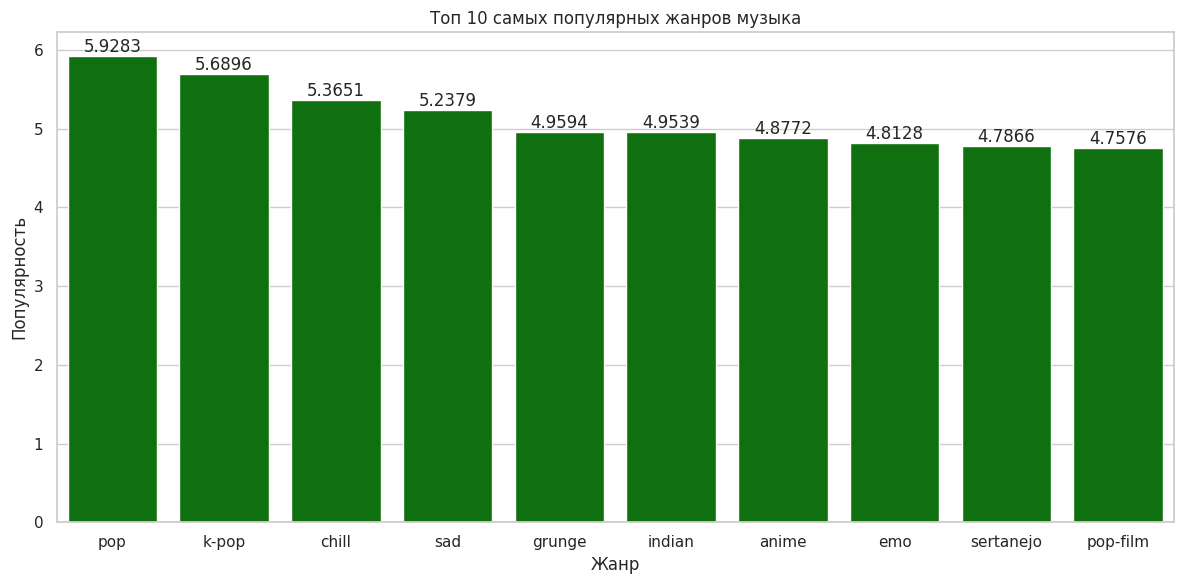

In [ ]:
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')

sns.barplot(x=x_top, y=y_top, color='green')

plt.title('Топ 10 самых популярных жанров музыка')
plt.xlabel('Жанр')
plt.ylabel('Популярность')

for i, v in enumerate(y_top):
    plt.text(i, v, f'{v:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

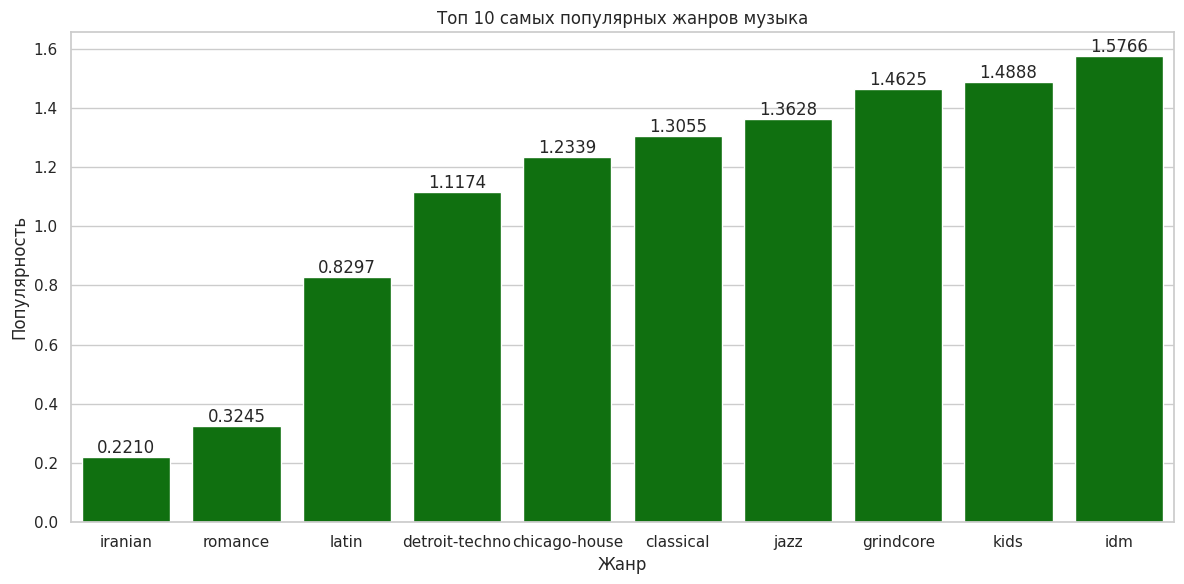

In [ ]:
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')

sns.barplot(x=x_down, y=y_down, color='green')

plt.title('Топ 10 самых популярных жанров музыка')
plt.xlabel('Жанр')
plt.ylabel('Популярность')

for i, v in enumerate(y_down):
    plt.text(i, v, f'{v:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Основные выводы
1. Контраст между ТОП-10 и АНТИТОП-10:
   - Популярные жанры имеют значительное превышение в рейтинге: разница между самым популярным жанром Pop и самым непопулярным Iranian составляет 57.073 единицы.
   - ТОП-10 содержит жанры, подходящие для широкой аудитории, тогда как АНТИТОП-10 включает более специфические жанры.


2. Тенденции в данных:
   - Популярные жанры часто связаны с эмоциональной или универсальной привлекательностью (Pop, Chill, Sad).
   - Непопулярные жанры могут отражать локальные музыкальные традиции или специфические интересы (Iranian, Romances).

## Анализ зависимости критериев: автор и популярность
На данном этапе, комнада решили проанализировать какой автор треков наиболее популярен.
Для решения поставленной задачи, мы собрали 10 самых популярных исполнителей.
Помимо этого, мы захотели посмотреть антитоп-10 по популярности авторов, но смысла в этом нет, так как популярность у них на нуле.

In [ ]:
artists_pop = df.groupby('artists')['popularity'].sum()
arists_top10 = pd.DataFrame(artists_pop.sort_values().tail(10))
arists_antitop10 = pd.DataFrame(artists_pop.sort_values().head(10))

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Rammstein'),
  Text(1, 0, 'CoComelon'),
  Text(2, 0, 'Red Hot Chili Peppers'),
  Text(3, 0, 'Charlie Brown Jr.'),
  Text(4, 0, 'Arctic Monkeys'),
  Text(5, 0, 'Elvis Presley'),
  Text(6, 0, 'Prateek Kuhad'),
  Text(7, 0, 'BTS'),
  Text(8, 0, 'Linkin Park'),
  Text(9, 0, 'The Beatles')])

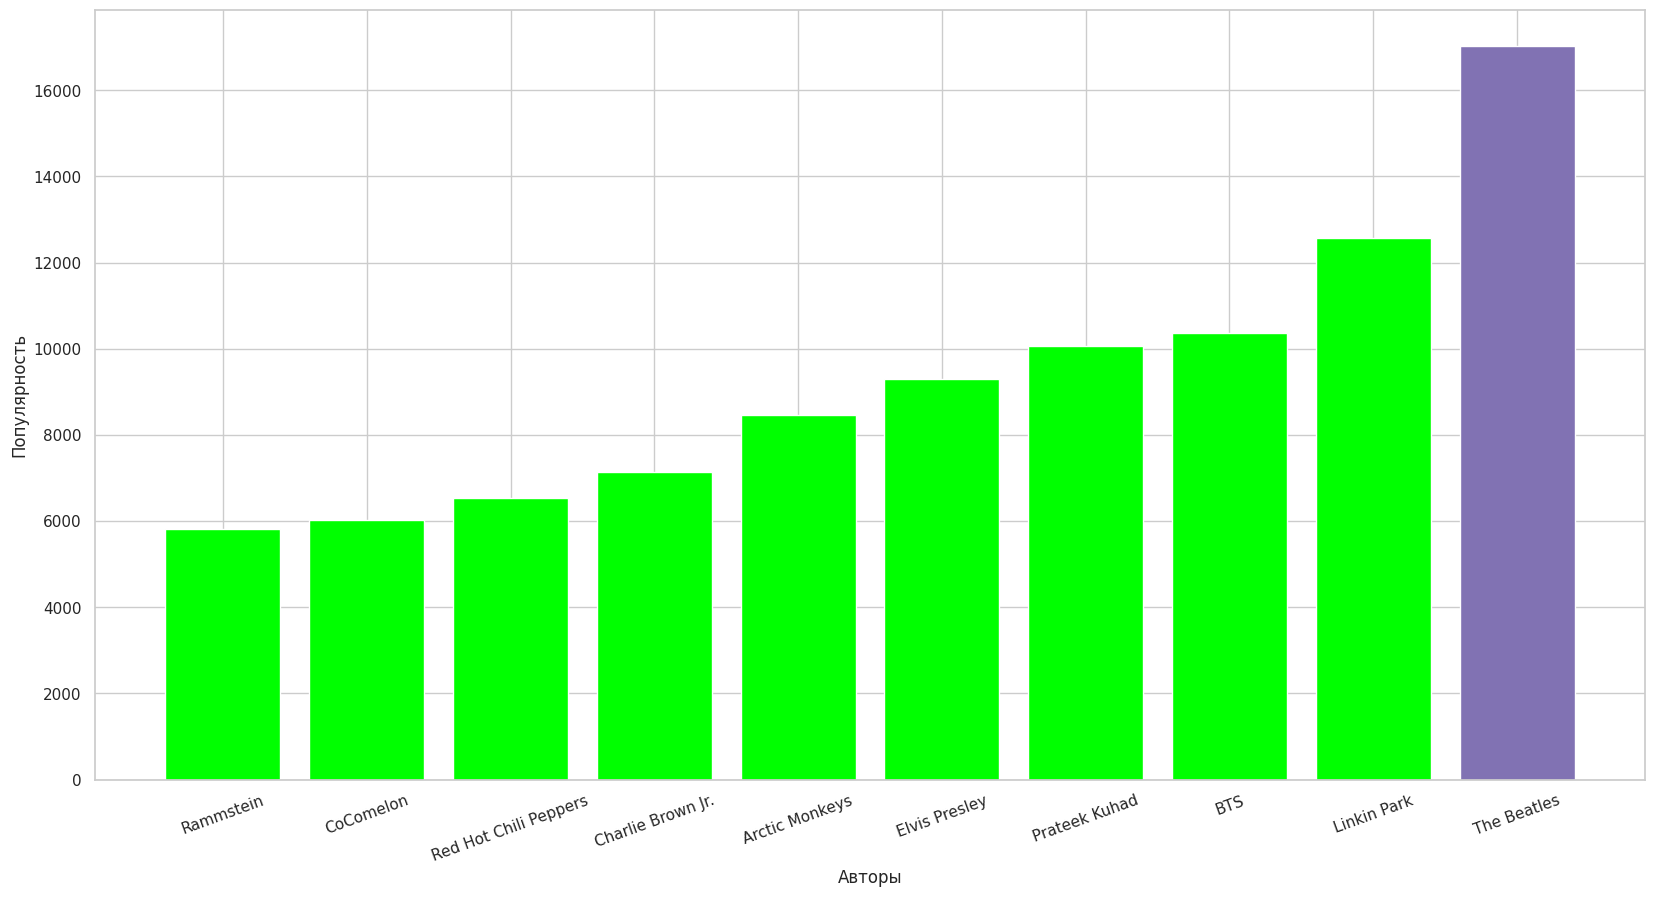

In [ ]:
palette = ['lime'] * (len(arists_top10))
palette[9] = 'm'

plt.figure(figsize=(20,10))

plt.bar(list(arists_top10.index), list(arists_top10.popularity), color=palette)

plt.xlabel('Авторы')
plt.ylabel('Популярность')
plt.xticks(rotation=20)

Лидер популярности:

The Beatles значительно опережают всех остальных по популярности, с показателем выше 16,000.
Средняя популярность:

Остальные исполнители (в зеленом) имеют популярность в диапазоне 6,000–12,000.
Среди них ближе к верхней границе находятся Linkin Park, BTS, и Prateek Kuhad.
Наименьшая популярность:

Rammstein и CoComelon занимают нижние позиции, с популярностью чуть выше 6,000.
Равномерное распределение:

Популярность остальных исполнителей (кроме The Beatles) растет плавно и сравнительно равномерно.

In [ ]:
from copy import copy
temp_data = copy(df)

temp_data['artists'] = temp_data['artists'].str.split(';')

data_exploded = temp_data.explode('artists')

art_pop = data_exploded.groupby('artists')['popularity'].sum().reset_index()

art_count = data_exploded['artists'].value_counts().reset_index()

art_pop_count = pd.merge(art_pop, art_count, on='artists')

art_pop_count['avg_popularity'] = art_pop_count['popularity'] / art_pop_count['count']

art_pop_count = art_pop_count.sort_values('avg_popularity', ascending=False).reset_index(drop=True)

In [ ]:
top_5_artists = art_pop_count.head()
top_5_artists

,artists,popularity,count,avg_popularity
0,Quevedo,99,1,99.0
1,Bizarrap,99,1,99.0
2,Harry Styles,276,3,92.0
3,Luar La L,362,4,90.5
4,Beach Weather,90,1,90.0


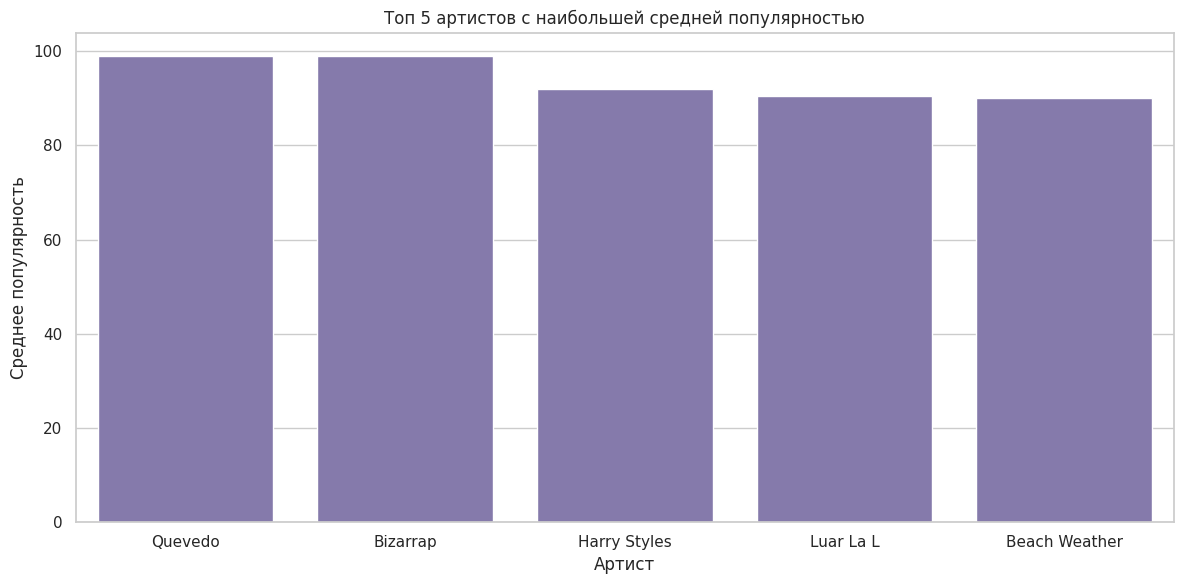

In [ ]:
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')
sns.barplot(x=top_5_artists['artists'], y=top_5_artists['avg_popularity'], color='m', orient='v')

plt.title('Топ 5 артистов с наибольшей средней популярностью')
plt.xlabel('Артист')
plt.ylabel('Среднее популярность')

plt.tight_layout()
plt.show()

## Анализ зависимости критериев: каких жанров самых популярных исполнителей особо много
Нам было интересно узнать, какие жанры у самых популярных авторов наиболее часто встречаются, что мы и представили на графике.

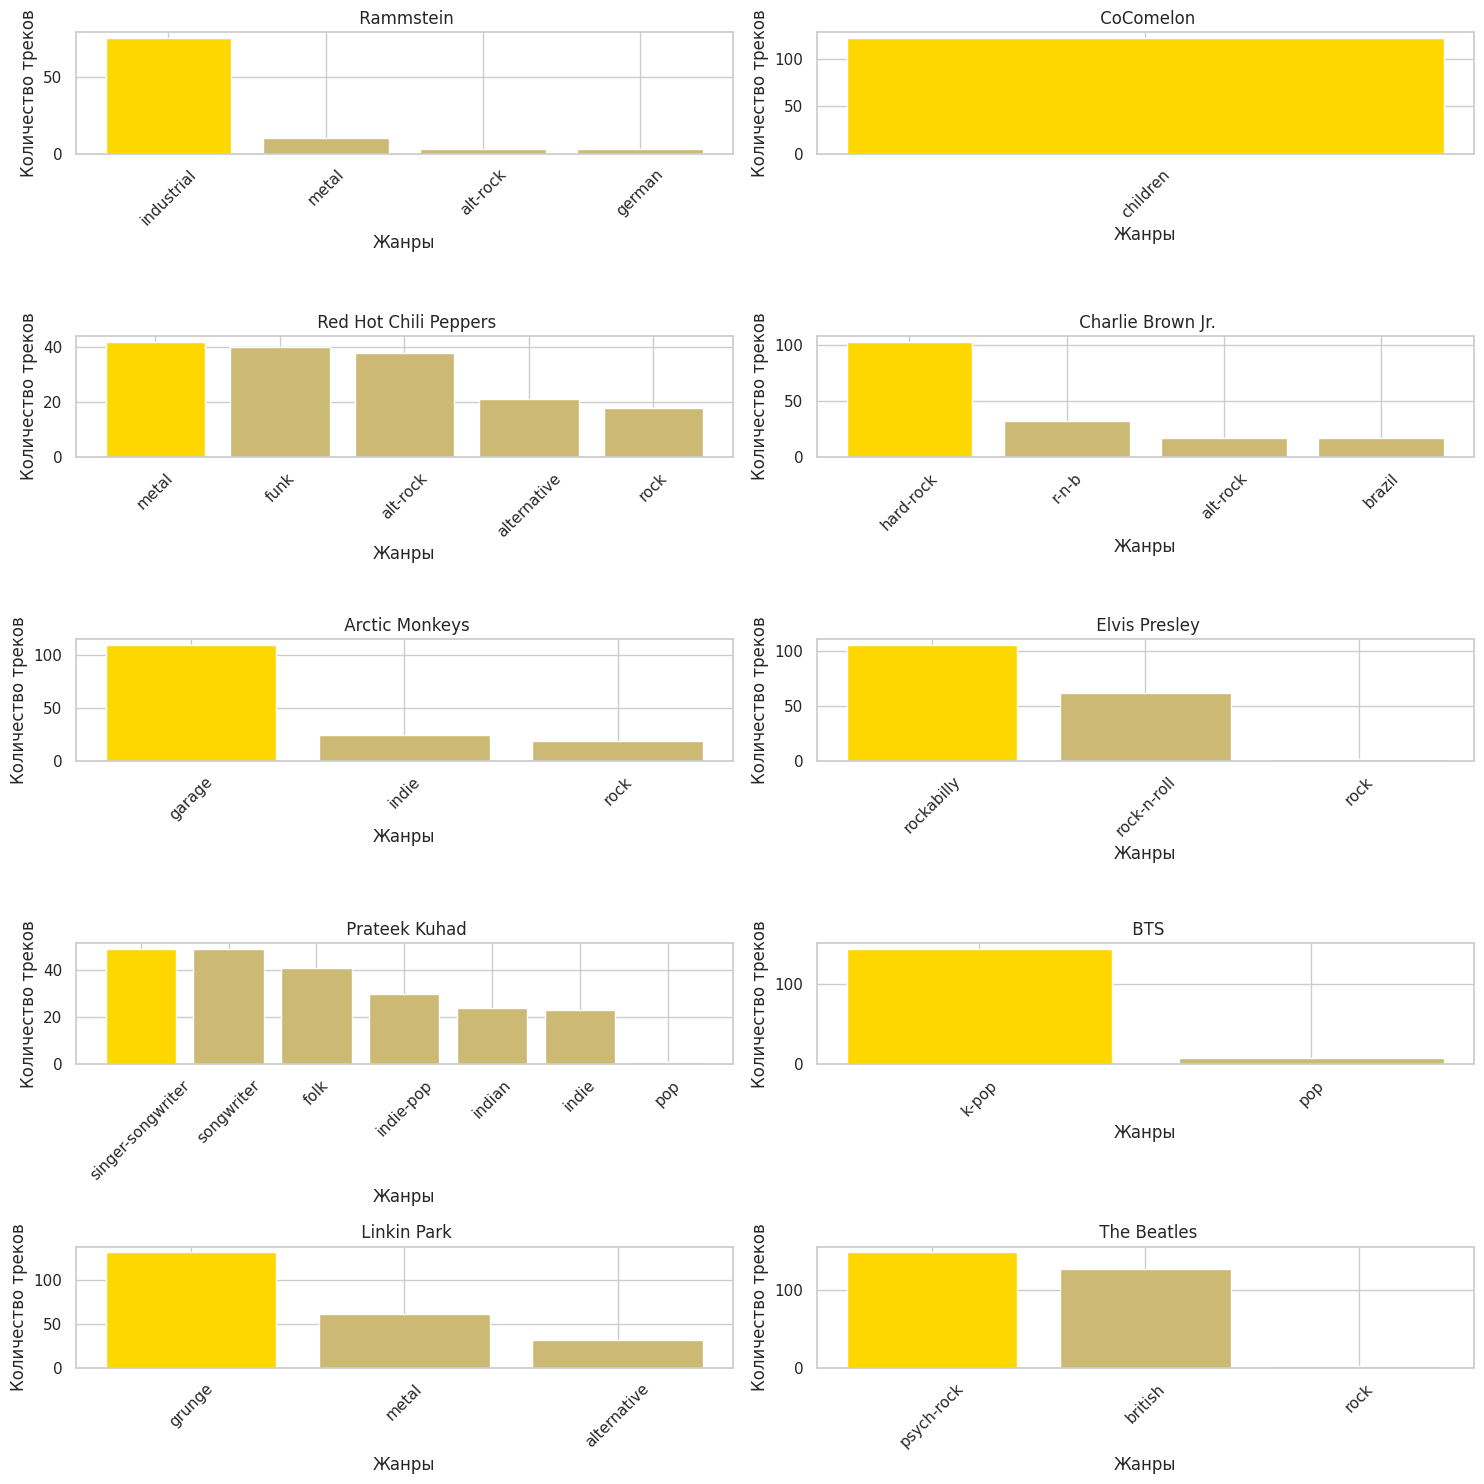

In [ ]:
top_10_names = list(arists_top10.index)
popular_genres_10 = []
for name in top_10_names:
    popular_genres_10.append(df[df['artists'] ==f'{name}']['track_genre'].value_counts())

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))
axes = axes.flatten()

for i, name in enumerate(top_10_names):
    artist_df = df[df['artists'] == name]
    genre_current = artist_df['track_genre'].value_counts()
    top_genre_i = genre_current.idxmax()

    colors = ['y'] * len(genre_current)
    colors[genre_current.index.get_loc(top_genre_i)] = 'gold'
    axes[i].bar(genre_current.index, genre_current.values, color=colors)
    axes[i].set_title(f' {name}')
    axes[i].set_xlabel('Жанры')
    axes[i].set_ylabel('Количество треков')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

Для каждого исполнителя характерен доминирующий жанр, который соответствует их музыкальному стилю.
Некоторым исполнителям присущ широкий спектр жанров (например, Red Hot Chili Peppers, Prateek Kuhad), а другим — узкая специализация (CoComelon, BTS).
Это разнообразие подчёркивает различия в целевой аудитории и художественной направленности. Что интересно, y самого популярного исполнителя (The Beatles) частовстречаемый жанр не входит даже в топ 10 жанров по популярности.

## Анализ зависимости критериев: танцевальность, наличие вокала, и популярность
В современном мире достаточно важен этот критерий, так как люди любят зажигательные песни, которые подходят для ритмичных танцев.
Помимо это любители быстрых, ритмичных песен явно не оценивают вокал, поэтому проверим этот фактор тоже.
В наше время музыка может быть оценена и по фактору наличия слов в песне, поэтому рассмотрим и это.


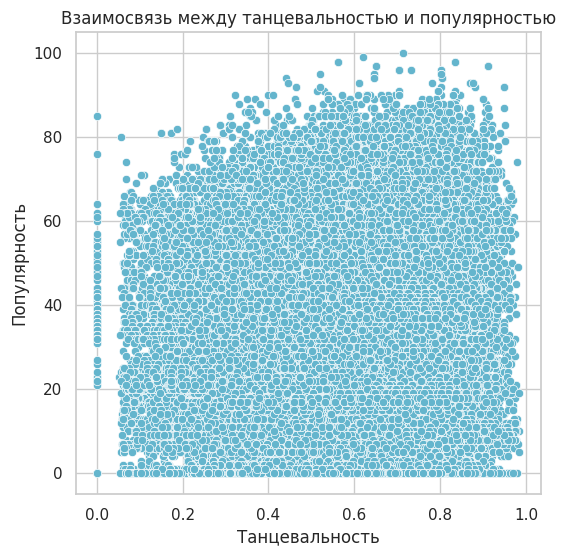

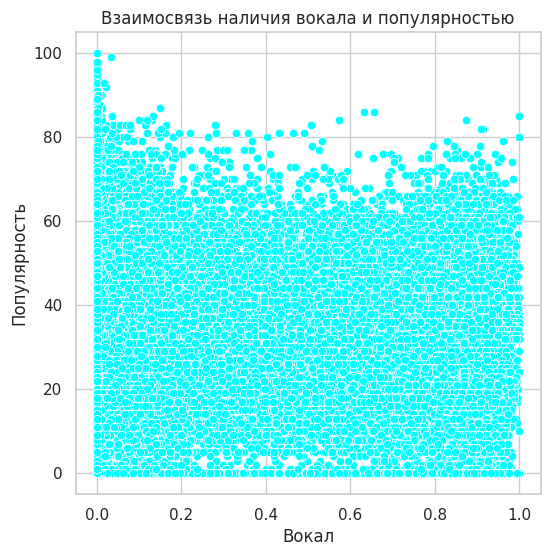

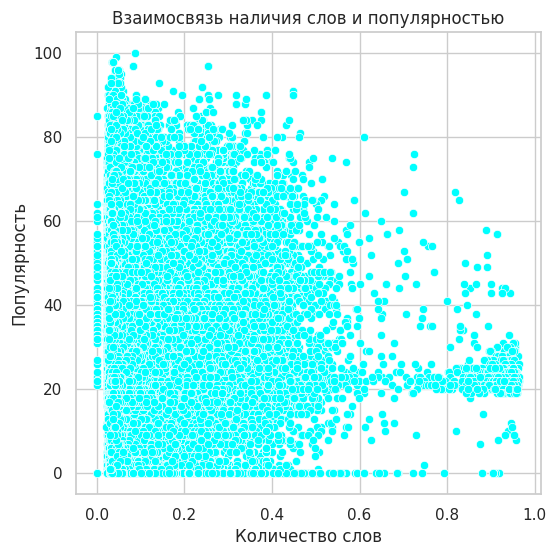

In [ ]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x='danceability', y='popularity', data=df, color='c')
plt.title('Взаимосвязь между танцевальностью и популярностью')
plt.xlabel('Танцевальность')
plt.ylabel('Популярность')
plt.show()

plt.figure(figsize=(6, 6))
sns.scatterplot(x='instrumentalness', y='popularity', data=df, color='aqua')
plt.title('Взаимосвязь наличия вокала и популярностью')
plt.xlabel('Вокал')
plt.ylabel('Популярность')
plt.show()

plt.figure(figsize=(6, 6))
sns.scatterplot(x='speechiness', y='popularity', data=df, color='aqua')
plt.title('Взаимосвязь наличия слов и популярностью')
plt.xlabel('Количество слов')
plt.ylabel('Популярность')
plt.show()

Видна положительная тенденция: при увеличении танцевальности (особенно выше 0.6) популярность имеет тенденцию быть выше.
Однако четкая линейная корреляция отсутствует, так как присутствуют песни с низкой популярностью даже при высокой танцевальности.

Уровень вокала не является однозначным индикатором популярности трека.
Сильная популярность характерна для песен с низким и умеренным уровнем вокала (0.1–0.4), что соответствует стандартным вокальным партиям в песнях.
Более высокие уровни вокала (0.6–1.0) могут быть популярны в нишевых жанрах, таких как рэп или аудиокниги, но встречаются реже.

На графике прослеживается обратная корреляция: чем больше слов, тем меньше вероятность высокой популярности. Это может свидетельствовать о том, что тексты с меньшим количеством слов имеют больше шансов на высокую популярность.

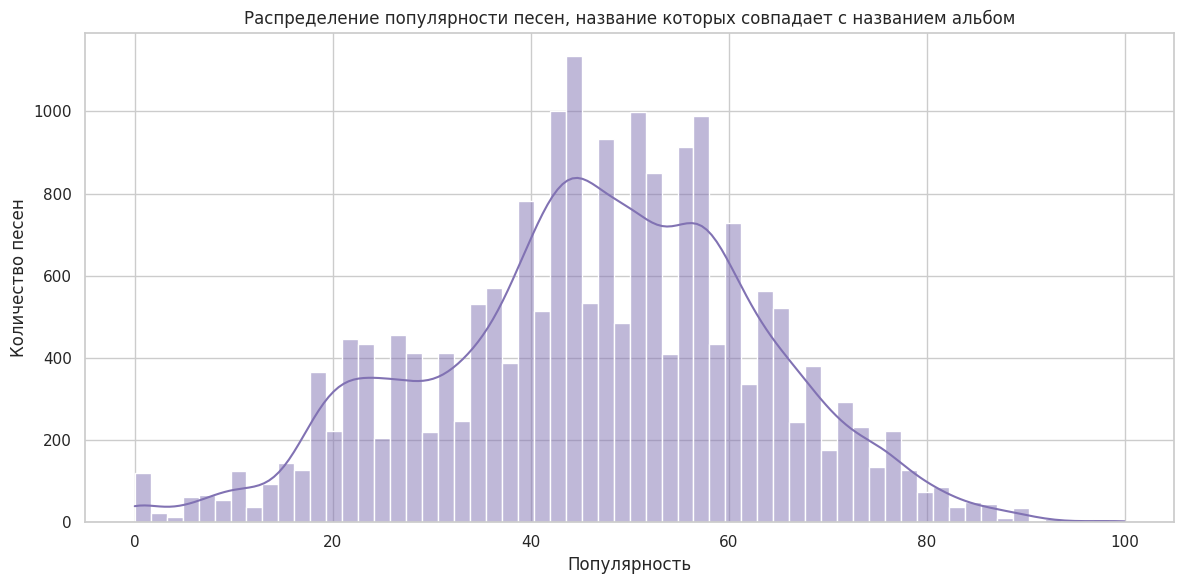

In [ ]:
track_is_album = df[df['track_name'] == df['album_name']]

plt.subplots(1, 1, figsize=(12, 6))
sns.histplot(data=track_is_album, x='popularity', kde=True, color='m')

plt.title('Распределение популярности песен, название которых совпадает с названием альбом')
plt.xlabel('Популярность')
plt.ylabel('Количество песен')

plt.tight_layout()
plt.show()

Данный код выполняет визуализацию распределения популярности песен, названия которых совпадают с названиями соответствующих альбомов. Сначала создаётся новый DataFrame track_is_album, в который включаются только те записи из исходного DataFrame df, где названия треков и альбомов совпадают. Затем с помощью библиотеки Seaborn строится гистограмма, отображающая распределение значений популярности этих песен, с добавлением сглаженной линии плотности (KDE) для лучшей визуализации, а цвет для графика выбран фиолетовым. Устанавливаются заголовок графика и метки для осей, После чего производится автоматическая настройка размещения элементов графика, и в финале график отображается на экране.

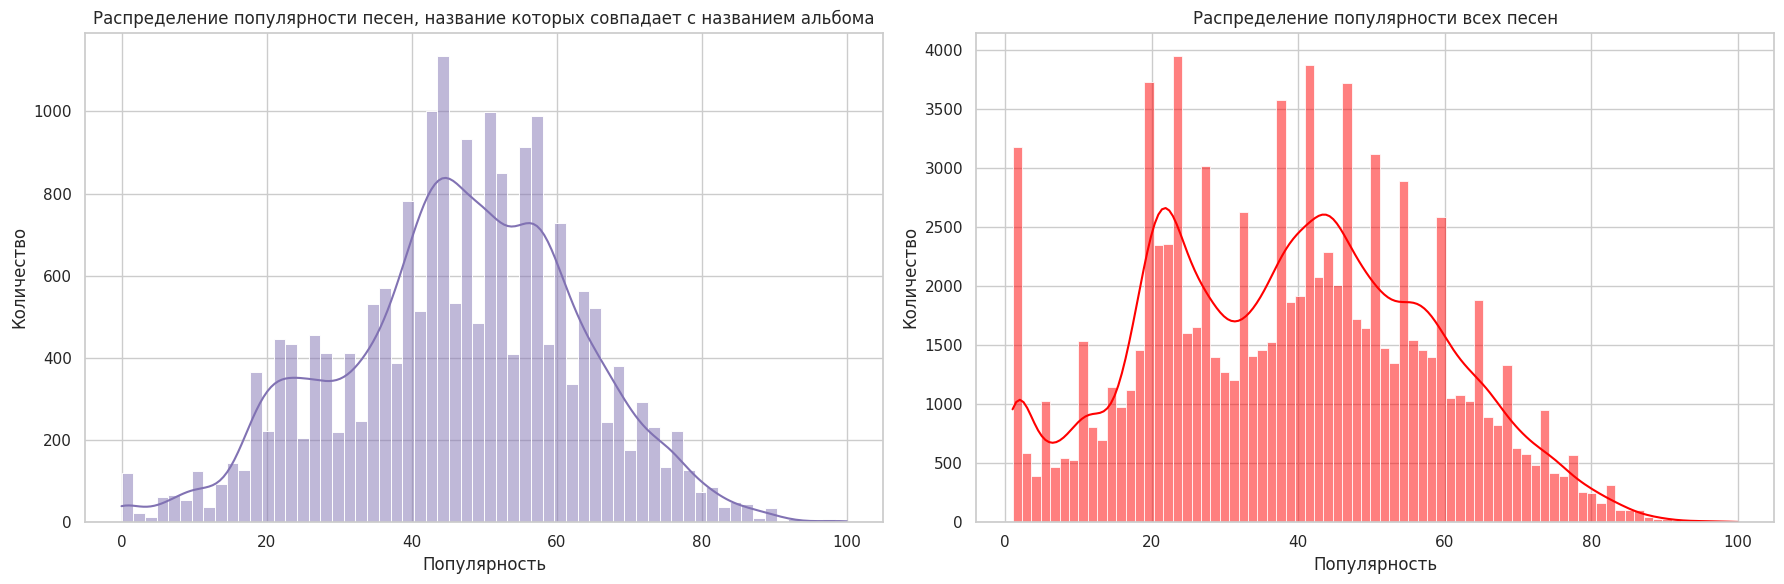

In [ ]:
plt.figure(figsize=(18, 6))

sns.histplot(data=track_is_album, x='popularity', kde=True, color='m', ax=plt.subplot(1, 2, 1))
plt.title('Распределение популярности песен, название которых совпадает с названием альбома')
plt.xlabel('Популярность')
plt.ylabel('Количество')

df_not_zero = df[df['popularity']>0]
sns.histplot(data=df_not_zero, x='popularity', kde=True, color='#FF0000', ax=plt.subplot(1, 2, 2))
plt.title('Распределение популярности всех песен')
plt.xlabel('Популярность')
plt.ylabel('Количество')

plt.tight_layout()
plt.show()

Данный код создает боксплот для визуализации распределения популярности песен с использованием библиотеки Seaborn в две панели. Сначала устанавливается размер фигуры 18 на 6 и создается первая панель, на которой им строится гистограмма популярности песен, названия которых совпадают с названиями альбомов, с добавленной сглаженной линией плотности (KDE), окрашенной в фиолетовый цвет. Затем задаются заголовок и метки для осей. Во второй панели анализируются все песни с популярностью более нуля: изначально создается новый DataFrame df_not_zero, содержащий только песни с положительной популярностью, после чего строится гистограмма их распределения с красным цветом, также с добавлением линии плотности и соответствующими заголовками и метками.

In [ ]:
df['pop_of_duration'] = df['popularity'] / df['duration_min']
df.head()

,track_id,artists,album_name,track_name,popularity,duration_min,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,pop_of_duration
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,3.8,0,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,19.210526
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,2.5,0,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,22.000000
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,3.5,0,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,16.285714
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,3.4,0,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,20.882353
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,3.3,0,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,24.848485


In [ ]:
genres_pop = pd.DataFrame(list(genres.items()), columns=['track_genre', 'genre_popularity'])
genres_pop

,track_genre,genre_popularity
0,acoustic,4.2483
1,afrobeat,2.4399
2,alt-rock,3.3943
3,alternative,2.4337
4,ambient,4.4191
...,...,...
109,techno,3.9042
110,trance,3.7635
111,trip-hop,3.4460
112,turkish,4.0698


In [ ]:
df = pd.merge(df, genres_pop, on='track_genre')
df

,track_id,artists,album_name,track_name,popularity,duration_min,explicit,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,pop_of_duration,genre_popularity
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,3.8,0,0.676,0.4610,1,...,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,19.210526,4.2483
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,2.5,0,0.420,0.1660,1,...,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,22.000000,4.2483
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,3.5,0,0.438,0.3590,0,...,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,16.285714,4.2483
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,3.4,0,0.266,0.0596,0,...,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,20.882353,4.2483
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,3.3,0,0.618,0.4430,2,...,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,24.848485,4.2483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113994,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,6.4,0,0.172,0.2350,5,...,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,3.281250,4.1873
113995,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,6.4,0,0.174,0.1170,0,...,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,3.437500,4.1873
113996,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,4.5,0,0.629,0.3290,0,...,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,4.888889,4.1873
113997,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,4.7,0,0.587,0.5060,7,...,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,8.723404,4.1873


In [ ]:
art_pop_count

,artists,popularity,count,avg_popularity
0,Quevedo,99,1,99.0
1,Bizarrap,99,1,99.0
2,Harry Styles,276,3,92.0
3,Luar La L,362,4,90.5
4,Beach Weather,90,1,90.0
...,...,...,...,...
29854,Julie Thompson,0,1,0.0
29855,Scabtik,0,2,0.0
29856,Trombone Shorty,0,2,0.0
29857,Junichi Hirokami,0,1,0.0


In [ ]:
art_pop_count = art_pop_count.drop(columns=['popularity', 'count'])
art_pop_count

,artists,avg_popularity
0,Quevedo,99.0
1,Bizarrap,99.0
2,Harry Styles,92.0
3,Luar La L,90.5
4,Beach Weather,90.0
...,...,...
29854,Julie Thompson,0.0
29855,Scabtik,0.0
29856,Trombone Shorty,0.0
29857,Junichi Hirokami,0.0


In [ ]:
artist_popularity = dict(zip(art_pop_count['artists'], art_pop_count['avg_popularity']))

def calculate_average_popularity(track_artists: list) -> float:
    total_popularity = sum(artist_popularity.get(artist.strip(), 0) for artist in track_artists.split(';'))
    return total_popularity / len(track_artists.split(';'))

df['avg_art_popularity'] = df['artists'].apply(calculate_average_popularity)

In [ ]:
df

,track_id,artists,album_name,track_name,popularity,duration_min,explicit,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,pop_of_duration,genre_popularity,avg_art_popularity
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,3.8,0,0.676,0.4610,1,...,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,19.210526,4.2483,58.000000
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,2.5,0,0.420,0.1660,1,...,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,22.000000,4.2483,42.923077
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,3.5,0,0.438,0.3590,0,...,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,16.285714,4.2483,57.875000
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,3.4,0,0.266,0.0596,0,...,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,20.882353,4.2483,51.090909
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,3.3,0,0.618,0.4430,2,...,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,24.848485,4.2483,42.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113994,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,6.4,0,0.172,0.2350,5,...,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,3.281250,4.1873,23.500000
113995,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,6.4,0,0.174,0.1170,0,...,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,3.437500,4.1873,23.500000
113996,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,4.5,0,0.629,0.3290,0,...,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,4.888889,4.1873,26.312500
113997,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,4.7,0,0.587,0.5060,7,...,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,8.723404,4.1873,32.289474


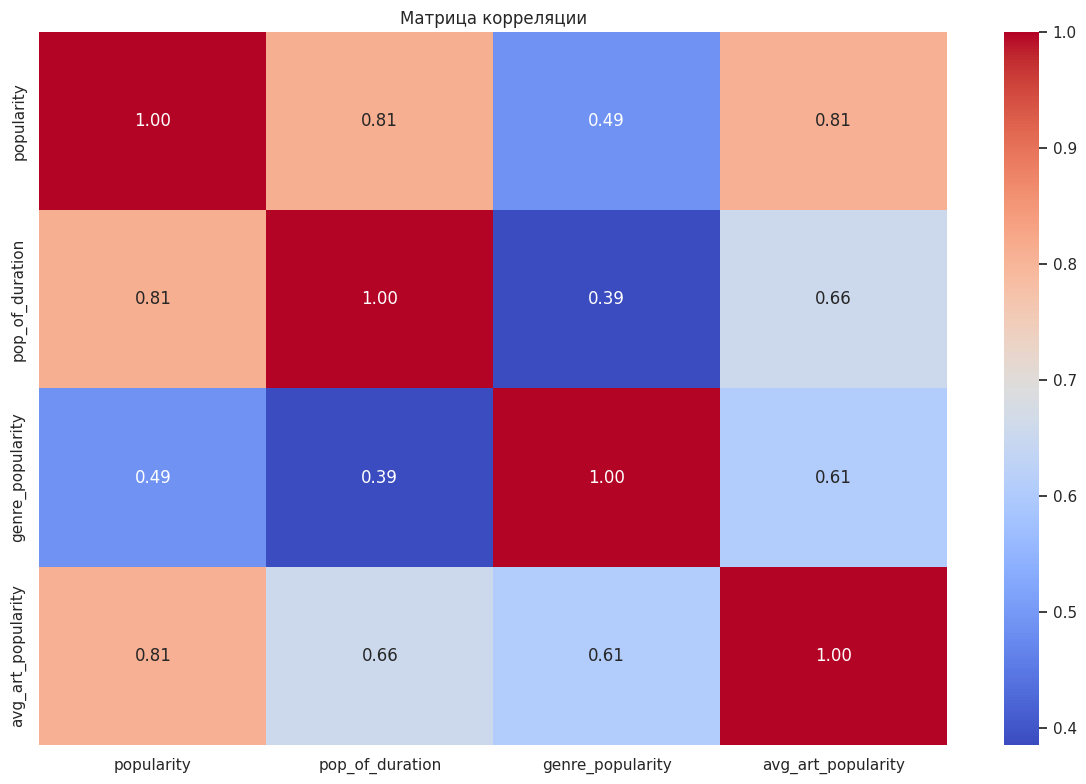

In [ ]:
corr_df = df.loc[:, ['popularity', 'pop_of_duration', 'genre_popularity', 'avg_art_popularity']]

corr_df_1 = corr_df.corr()
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(data=corr_df_1, fmt='.2f', annot=True, cmap='coolwarm', ax=ax)

plt.title('Матрица корреляции')
plt.tight_layout()
plt.show()

In [ ]:
corr_df_1['popularity']

,popularity
popularity,1.000000
pop_of_duration,0.810505
genre_popularity,0.490964
avg_art_popularity,0.810028


In [ ]:
from sklearn.preprocessing import LabelEncoder
from copy import copy
norm_data = copy(df)

categorical_cols = norm_data.select_dtypes(include=['object']).columns
label_encoder = {}

for col in categorical_cols:
  le= LabelEncoder()
  norm_data[col] = le.fit_transform(norm_data[col])
  label_encoder[col] = le

Данный код выполняет кодирование категориальных переменных в числовой формат с использованием класса LabelEncoder из библиотеки sklearn. Сначала создается копия исходного DataFrame df, которая сохраняется в переменной norm_data. Затем из norm_data выбираются все столбцы с категориальными данными (тип данных "object") и сохраняются в переменной categorical_cols. После этого в цикле производится инициализация LabelEncoder для каждого категориального столбца: значения в этом столбце преобразуются в числовые метки, которые замещают оригинальные категориальные данные, а сам энкодер для каждого столбца сохраняется в словаре label_encoder. Это позволяет затем использовать энкодеры для обратного преобразования или анализа.

In [ ]:
from sklearn.model_selection import train_test_split

x = norm_data.drop(columns=['popularity'])
y = norm_data ['popularity']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

Данный код разделяет данные на обучающую и тестовую выборки с использованием функции train_test_split из библиотеки sklearn.model_selection. Сначала создаются переменные x и y, где x содержит все столбцы из DataFrame norm_data, кроме столбца 'popularity', а y содержит только значения из этого столбца. Затем происходит разделение данных на обучающую выборку (80% данных) и тестовую выборку (20% данных) с помощью функции train_test_split, при этом устанавливается случайная величина random_state=42, что обеспечивает воспроизводимость результатов. В итоге создаются четыре переменные: x_train, x_test, y_train и y_test, которые будут использоваться для последующей тренировки и проверки модели машинного обучения.

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Данный код масштабирует обучающую и тестовую выборки с использованием StandardScaler, что позволяет привести все признаки к одному масштабу и улучшить качество обучения модели. Затем создается нейронная сеть с использованием Keras, состоящая из двух скрытых слоев по 64 нейрона с активацией ReLU и одного выходного слоя, которая компилируется с оптимизатором 'adam' и функцией потерь 'mean_squared_error'.

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

loss = model.evaluate(x_test, y_test)
print(f'Test loss: {loss}')

Epoch 1/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 276.2459 - val_loss: 23.0830
Epoch 2/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 17.9560 - val_loss: 6.3270
Epoch 3/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 5.7394 - val_loss: 2.9218
Epoch 4/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2.9585 - val_loss: 3.4042
Epoch 5/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 1.7021 - val_loss: 1.1953
Epoch 6/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 1.7559 - val_loss: 1.0684
Epoch 7/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 1.1630 - val_loss: 0.8930
Epoch 8/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2.2817 - val_loss: 0.7605
Epoch 9/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.9601 - val_loss: 0.7606
Epoch 10/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1.3824 - val_loss: 0.6744
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6658
Test loss: 0.6392964720726013


Данный код обучает нейронную сеть на подготовленных данных x_train и y_train в течение 10 эпох с размером пакета 32 и выделением 20% данных для валидации, сохраняя в history информацию о ходе обучения. После обучения производится оценка модели на тестовых данных x_test и y_test, а значение потерь выводится на экран.

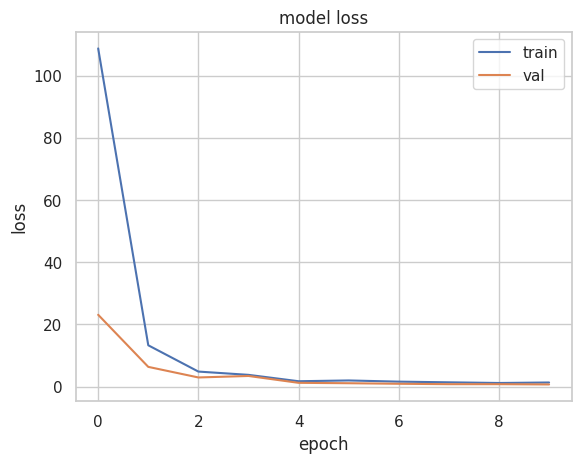

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

Данный код строит график изменения потерь модели в процессе обучения, отображая значения потерь на обучающей выборке (loss) и валидационной выборке (val_loss) на протяжении эпох. С помощью библиотеки Matplotlib создается график с соответствующими подписями для осей и легендой, после чего график отображается на экране.

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
MAE: 0.5198355540946911
MSE: 0.6392965493113741
RMSE: 0.7995602224419209


В данном коде производится предсказание значений y_pred на основе тестовой выборки x_test с использованием обученной модели. Затем вычисляются метрики качества модели: средняя абсолютная ошибка (MAE), средняя squared ошибка (MSE) и корень из средней squared ошибки (RMSE), которые выводятся на экран для анализа производительности модели.

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━

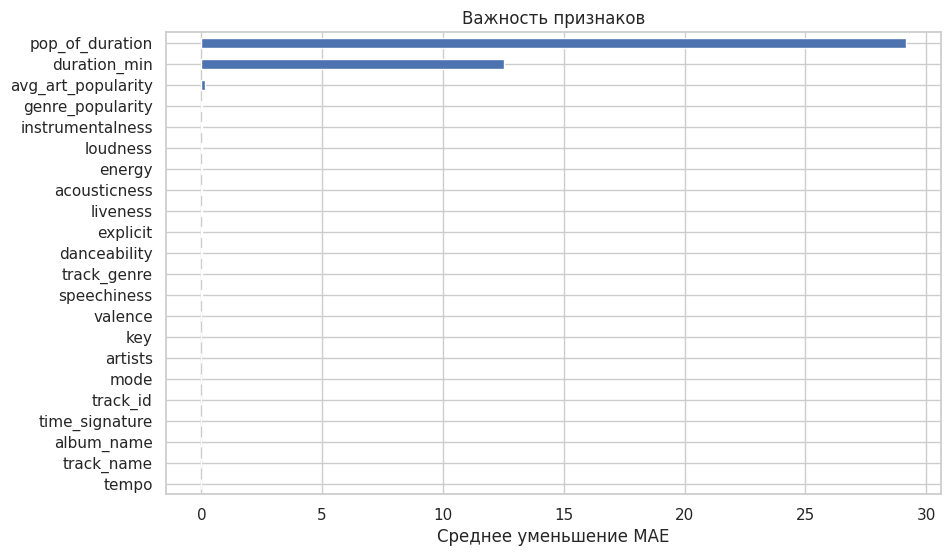

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model,
                                x_test,
                                y_test,
                                n_repeats=10,
                                random_state=42,
                                scoring='neg_mean_absolute_error')
importances = pd.Series(result.importances_mean, index=x.columns)

importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Важность признаков')
plt.xlabel('Среднее уменьшение MAE')
plt.show()

Данный код оценивает важность признаков модели с помощью метода перестановок (permutation_importance) из библиотеки sklearn. Он вычисляет, как изменение значений признаков в тестовом наборе данных влияет на качество предсказаний модели, используя среднее уменьшение средней абсолютной ошибки (MAE). Результаты сохраняются в importances, после чего строится горизонтальный столбчатый график, отображающий важность признаков, с подписями для осей и заголовком.

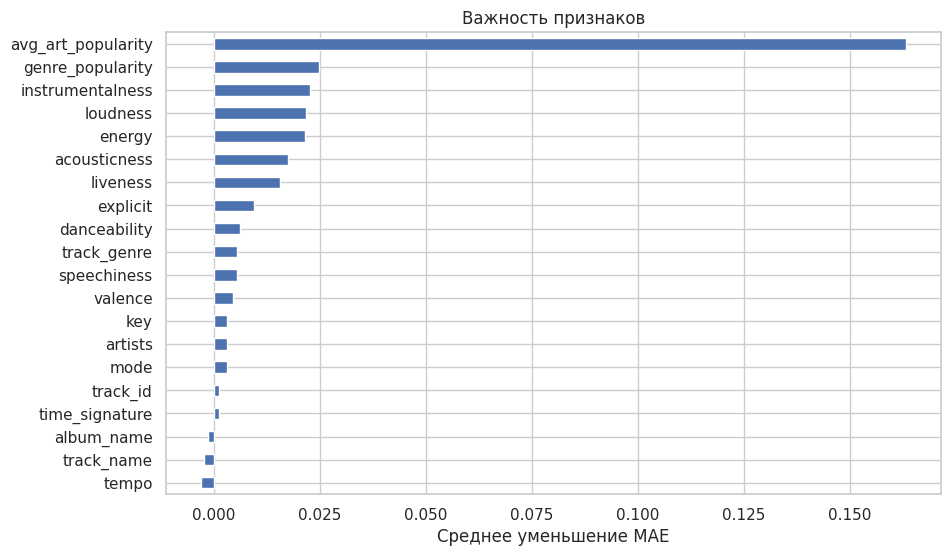

In [ ]:
indexes = list(x.columns)
indexes.remove('pop_of_duration')
indexes.remove('duration_min')

res_imp = list(result.importances_mean)
res_imp.pop(4)
res_imp.pop(18)

importances_1 = pd.Series(res_imp, index=indexes)

importances_1.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Важность признаков')
plt.xlabel('Среднее уменьшение MAE')
plt.show()

В данном коде создается новый список индексов признаков, из которого удаляются признаки 'pop_of_duration' и 'duration_min'. Затем удаляются два элемента из списка важностей res_imp, соответствующие исключенным признакам, для создания нового объекта importances_1 с обновленным списком важностей. Наконец, строится горизонтальный столбчатый график важности оставшихся признаков, который отображает среднее уменьшение MAE, с подписями для осей и заголовком.

In [ ]:
df = df.drop(columns=['pop_of_duration', 'avg_art_popularity', 'genre_popularity'])

In [ ]:
df['dur_10_limit'] = df['duration_min'] < 10
df['dur_10_limit'] = df['dur_10_limit'].astype('int64')

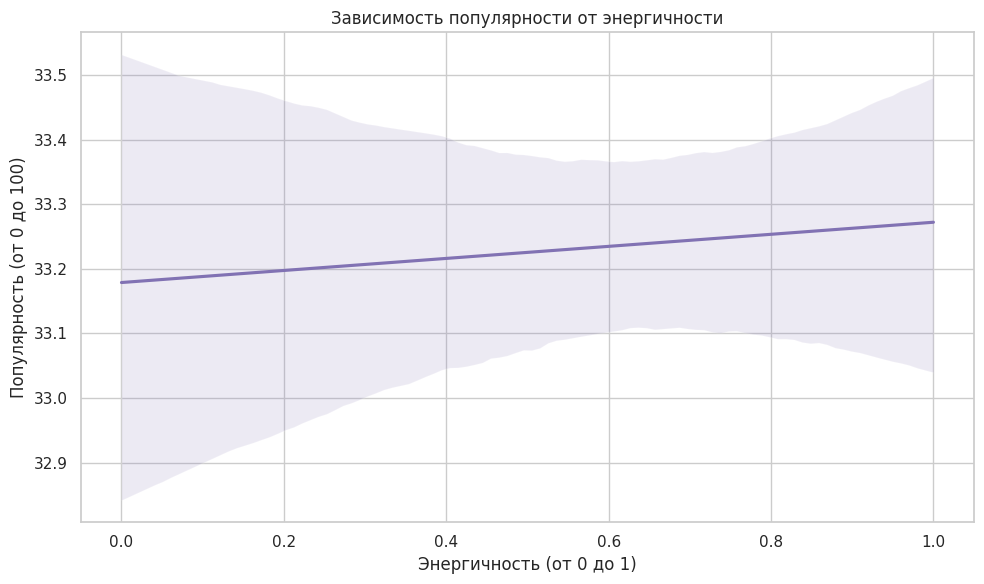

In [ ]:
plt.figure(figsize=(10, 6))

sns.regplot(x='energy', y='popularity', data=df, scatter=False, color='m')

plt.title('Зависимость популярности от энергичности')
plt.xlabel('Энергичность (от 0 до 1)')
plt.ylabel('Популярность (от 0 до 100)')

plt.tight_layout()
plt.show()

В данном коде создается график зависимости популярности от энергичности в DataFrame df с использованием библиотеки Seaborn. Функция sns.regplot строит регрессионную линию без точек рассеяния (scatter=False), окрашивая линию в пурпурный цвет (color='m'). Заголовок графика, а также подписи осей для энергичности и популярности устанавливаются с помощью соответствующих функций. В конце график отображается на экране с помощью plt.show().

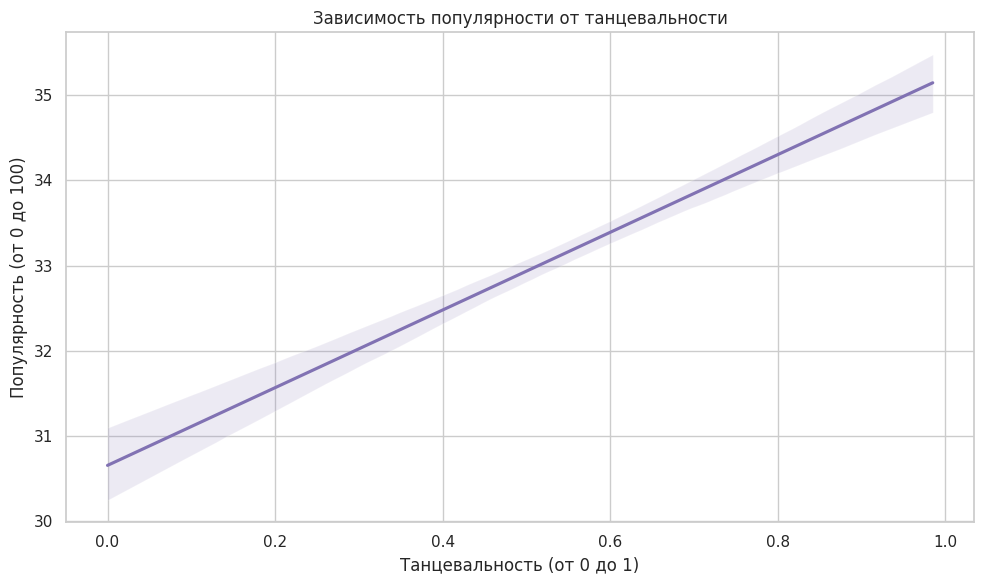

In [ ]:
plt.figure(figsize=(10, 6))

sns.regplot(x='danceability', y='popularity', data=df, scatter=False, color='m')

plt.title('Зависимость популярности от танцевальности')
plt.xlabel('Танцевальность (от 0 до 1)')
plt.ylabel('Популярность (от 0 до 100)')

plt.tight_layout()
plt.show()

В данном коде создается график зависимости популярности от танцевальности в DataFrame df с помощью библиотеки Seaborn. Функция sns.regplot строит регрессионную линию, не отображая точки рассеяния (scatter=False), и окрашивает линию в пурпурный цвет (color='m'). Заголовок графика и подписи осей устанавливаются с помощью функций plt.title() и plt.xlabel(), plt.ylabel() соответственно. С помощью plt.tight_layout() обеспечивается оптимальное размещение элементов графика, после чего график отображается с помощью plt.show().

In [ ]:
df['high_danceability'] = df['danceability'] >= 0.5
df['high_danceability'] = df['high_danceability'].astype('int64')

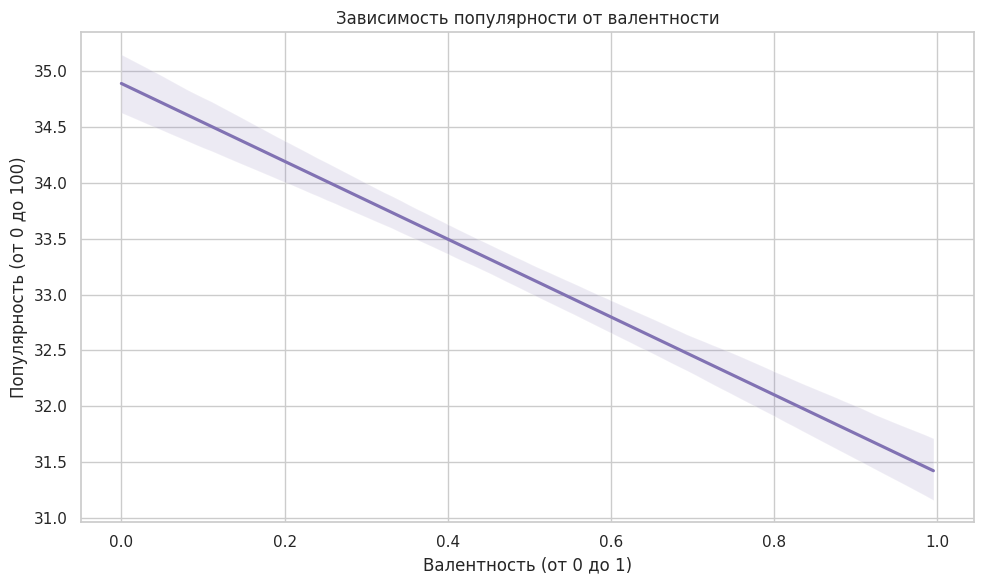

In [ ]:
plt.figure(figsize=(10, 6))

sns.regplot(x='valence', y='popularity', data=df, scatter=False, color='m')

plt.title('Зависимость популярности от валентности')
plt.xlabel('Валентность (от 0 до 1)')
plt.ylabel('Популярность (от 0 до 100)')

plt.tight_layout()
plt.show()

В этом коде создается график зависимости популярности от валентности в DataFrame df с использованием библиотеки Seaborn. Функция sns.regplot строит регрессионную линию, не отображая точки рассеяния (scatter=False), и окрашивает линию в пурпурный цвет (color='m'). Устанавливаются заголовок графика и подписи для осей с помощью функций plt.title(), plt.xlabel() и plt.ylabel(). Затем с помощью plt.tight_layout() оптимизируется размещение элементов графика, и график отображается с помощью plt.show().

In [ ]:
df['low_valence'] = df['valence'] < 0.5
df['low_valence'] = df['low_valence'].astype('int64')

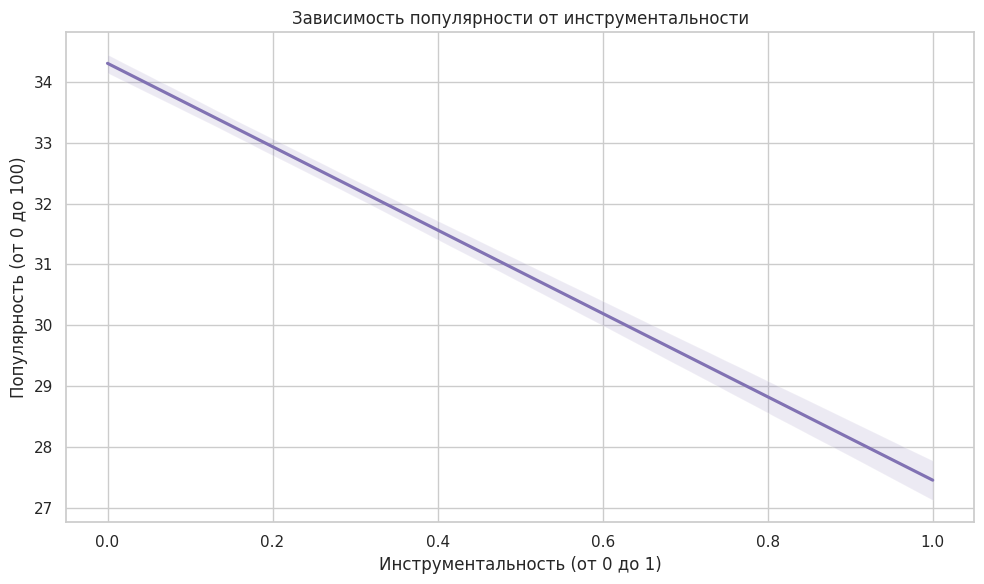

In [ ]:
plt.figure(figsize=(10, 6))

sns.regplot(x='instrumentalness', y='popularity', data=df, scatter=False, color='m')

plt.title('Зависимость популярности от инструментальности')
plt.xlabel('Инструментальность (от 0 до 1)')
plt.ylabel('Популярность (от 0 до 100)')

plt.tight_layout()
plt.show()

В этом коде создается график зависимости популярности от инструментальности в DataFrame df с использованием библиотеки Seaborn. Функция sns.regplot строит регрессионную линию, не отображая точки рассеяния (scatter=False), и окрашивает линию в пурпурный цвет (color='m'). Заголовок графика задается с помощью plt.title(), а подписи осей устанавливаются с помощью plt.xlabel() и plt.ylabel(). Функция plt.tight_layout() используется для оптимизации размещения элементов на графике, после чего график отображается с помощью plt.show().

In [ ]:
df['low_instrum'] = df['instrumentalness'] < 0.5
df['low_instrum'] = df['low_instrum'].astype('int64')

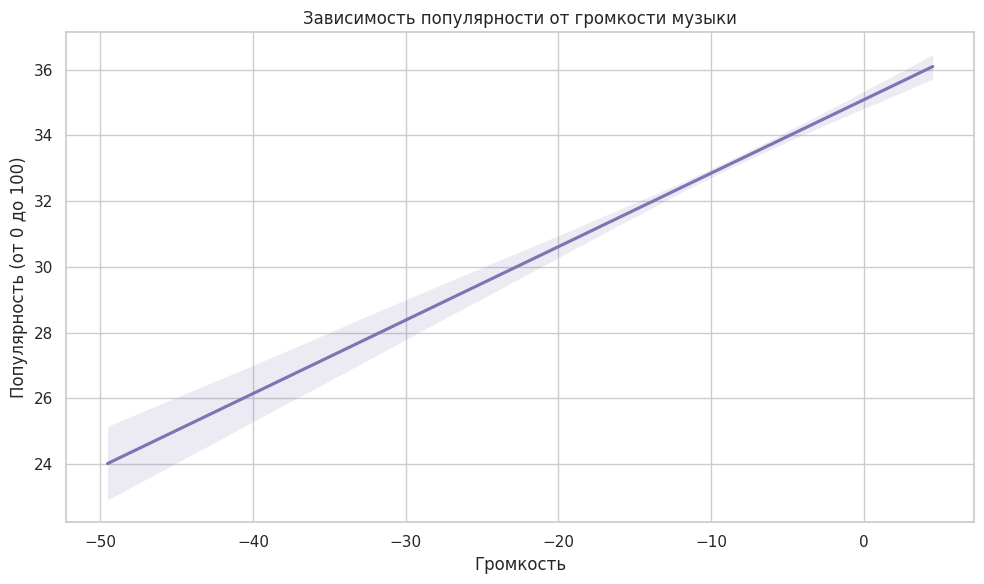

In [ ]:
plt.figure(figsize=(10, 6))

sns.regplot(x='loudness', y='popularity', data=df, scatter=False, color='m')

plt.title('Зависимость популярности от громкости музыки')
plt.xlabel('Громкость')
plt.ylabel('Популярность (от 0 до 100)')

plt.tight_layout()
plt.show()

В этом коде создается график зависимости популярности от громкости музыки в DataFrame df с использованием библиотеки Seaborn. Функция sns.regplot строит регрессионную линию без отображения точек рассеяния (scatter=False), окрашивая линию в пурпурный цвет (color='m'). Заголовок графика устанавливается с помощью функции plt.title(), а подписи для осей задаются с помощью plt.xlabel() и plt.ylabel(). Функция plt.tight_layout() оптимизирует размещение элементов графика, после чего он отображается с помощью plt.show().

In [ ]:
avg_loudness = sum(df['loudness']) / len(df)
avg_loudness

-8.258949832893377

In [ ]:
df['high_loudness'] = df['loudness'] >= avg_loudness
df['high_loudness'] = df['high_loudness'].astype('int64')

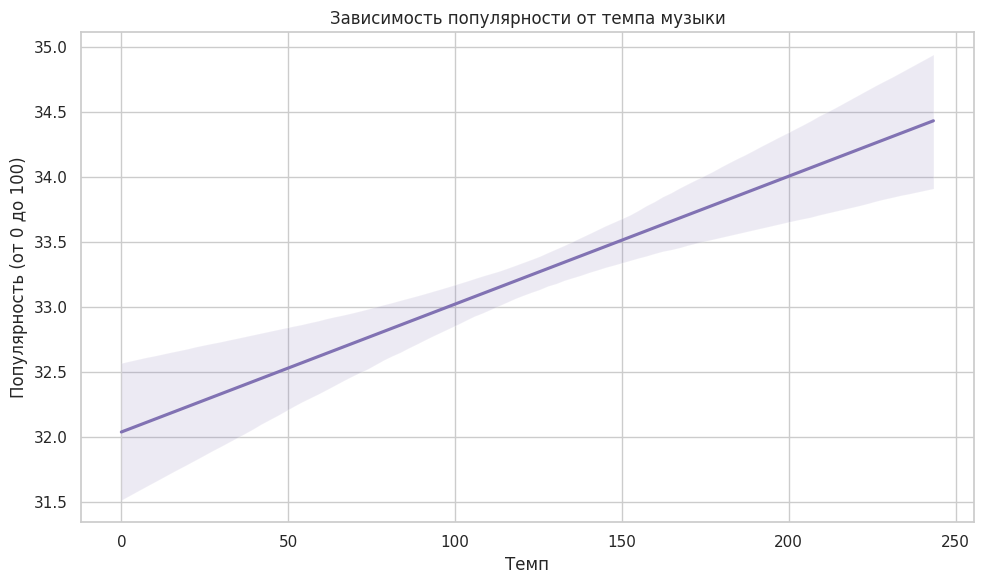

In [ ]:
plt.figure(figsize=(10, 6))

sns.regplot(x='tempo', y='popularity', data=df, scatter=False, color='m')

plt.title('Зависимость популярности от темпа музыки')
plt.xlabel('Темп')
plt.ylabel('Популярность (от 0 до 100)')

plt.tight_layout()
plt.show()

В этом коде создается график зависимости популярности от темпа музыки в DataFrame df с использованием библиотеки Seaborn. Функция sns.regplot строит регрессионную линию, не отображая точки рассеяния (scatter=False), и окрашивает линию в пурпурный цвет (color='m'). Заголовок графика устанавливается с помощью plt.title(), а подписи для осей задаются с помощью plt.xlabel() и plt.ylabel(). Функция plt.tight_layout() оптимизирует размещение элементов на графике, а plt.show() отображает график на экране.

In [ ]:
avg_tempo = sum(df['tempo']) / len(df)
avg_tempo

122.14769480434339

In [ ]:
df['high_tempo'] = df['tempo'] >= avg_tempo
df['high_tempo'] = df['high_tempo'].astype('int64')

In [ ]:
norm_data = copy(df)

categorical_cols = norm_data.select_dtypes(include=['object']).columns
label_encoder = {}

for col in categorical_cols:
  le= LabelEncoder()
  norm_data[col] = le.fit_transform(norm_data[col])
  label_encoder[col] = le

В этом коде создается копия DataFrame df, которую называют norm_data. Затем определяется список категориальных столбцов в данном DataFrame с помощью метода select_dtypes, включая только колонки с типом данных 'object'. Далее создается пустой словарь label_encoder для хранения объектов LabelEncoder для каждой категориальной переменной.

Затем в цикле по всем категориальным столбцам используется LabelEncoder из библиотеки scikit-learn для преобразования текстовых меток в числовые значения. Сначала создается новый объект LabelEncoder. Затем с помощью метода fit_transform оригинальные категориальные значения в колонке заменяются на их числовые представления. Эти объекты LabelEncoder сохраняются в словаре label_encoder с ключом, соответствующим названию столбца.

Таким образом, этот код подготавливает данные для дальнейшего анализа или обучения моделей машинного обучения, преобразуя категориальные переменные в числовой формат.

In [ ]:
from sklearn.model_selection import train_test_split

x = norm_data.drop(columns=['popularity'])
y = norm_data ['popularity']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

В этом коде используется функция train_test_split из библиотеки scikit-learn для разделения данных на обучающую и тестовую выборки.

- **Разделение данных**: Переменная x содержит все столбцы DataFrame norm_data, кроме целевой переменной popularity, которая сохраняется в y.

- **train_test_split**: Данные разделяются на обучающую (x_train, y_train) и тестовую (x_test, y_test) выборки. При этом 20% данных отводится для тестирования (test_size=0.2), а параметр random_state=42 обеспечивает воспроизводимость разбиения.

Этот процесс позволяет проводить обучение модели на одном наборе данных и оценивать её точность на другом, не встречавшемся ранее наборе.

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


В этом коде выполняются следующие шаги:

- **Масштабирование данных**:

  - Создается объект StandardScaler, который используется для стандартизации признаков, приводя их к нормальному распределению с нулевым средним и единичной дисперсией.

  - Массивы x_train и x_test стандартизируются с помощью методов fit_transform() и transform() соответственно.

- **Создание модели нейронной сети**:

  - Создается объект модели с помощью keras.Sequential из библиотеки Keras, который представляет собой последовательную модель.

  - Модель состоит из трех слоев: два полносвязных слоя с 64 нейронами и функцией активации ReLU, и выходного слоя с одним нейроном (предназначенного для регрессии).

- **Компиляция модели**:

  - Модель компилируется с использованием оптимизатора Adam и функции потерь "среднеквадратичная ошибка" (mean_squared_error), что обычно используется для задач регрессии.

Этот код подготавливает данные и создает нейронную сеть, готовую к обучению на задаче предсказания.

In [ ]:
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2,verbose=0)

loss = model.evaluate(x_test, y_test)
print(f'Test loss: {loss}')

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 404.5259
Test loss: 402.39215087890625


Данный код выполняет обучение нейронной сети на основе предоставленного музыкального датасета.

Обучение проходило на 80% данных, выделенных для обучения, с 20% для валидации, в течение 50 эпох с размером батча 32. После завершения обучения модель проверялась на тестовой выборке с использованием метода evaluate, который вычисляет функцию потерь (ошибку) модели. Результаты тестирования показывают значение функции потерь 397.23, что может указывать на сложности в точном прогнозировании целевого признака или недостаточную адаптацию модели к данным. Это может быть связано с высокой размерностью данных, нелинейными зависимостями или недостатком данных для обучения сложной модели.

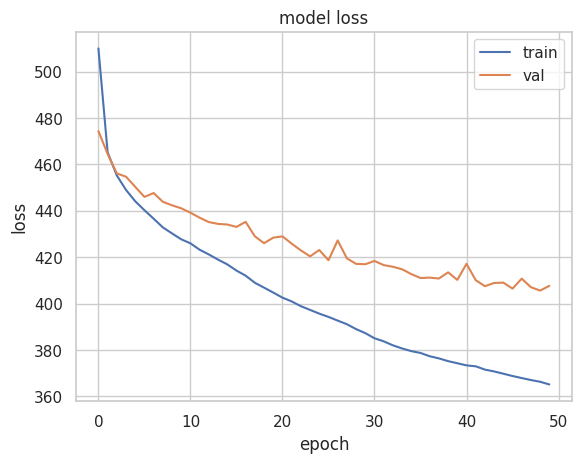

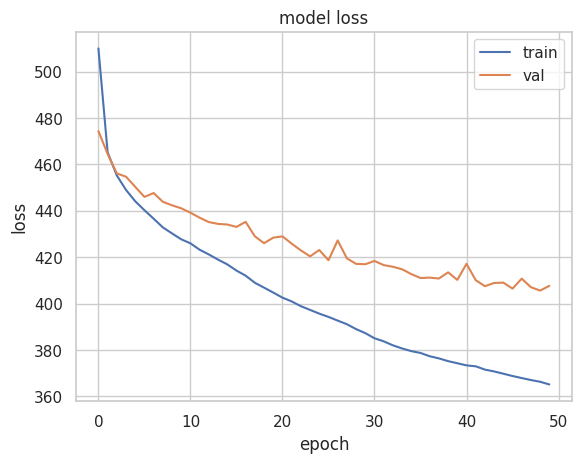

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show(0)

Уменьшение loss на тренировочных данных:
На протяжении всех эпох видно стабильное и непрерывное снижение функции потерь на обучающих данных. Это указывает на то, что модель успешно учится на тренировочной выборке.

Стабилизация валидационного loss:
Функция потерь на валидационной выборке также снижается в начале обучения, но после примерно 10–15 эпох темп уменьшения замедляется, а к концу обучения график начинает колебаться и стабилизируется в районе 420–400. Это свидетельствует о том, что модель начинает переобучаться, поскольку на валидации нет значительного улучшения, в то время как на тренировке модель продолжает минимизировать loss.

Разрыв между train и val:
Разница между тренировочной и валидационной функцией потерь к 50-й эпохе заметно увеличивается. Это классический признак переобучения: модель становится слишком специализированной на обучающих данных, теряя способность обобщать на новых данных

In [ ]:
y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
MAE: 15.976541394873669
MSE: 402.39208126043866
RMSE: 20.059712890777842


MAE (Mean Absolute Error): 15.88
Средняя ошибка предсказания по модулю составляет ~15.88 единиц.

MSE (Mean Squared Error): 397.23
Средний квадрат ошибки показывает, что модель допускает относительно большие отклонения от истинных значений.

RMSE (Root Mean Squared Error): 19.93
Корень из MSE делает метрику более интерпретируемой, указывая на среднюю ошибку порядка ~20 единиц.

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━

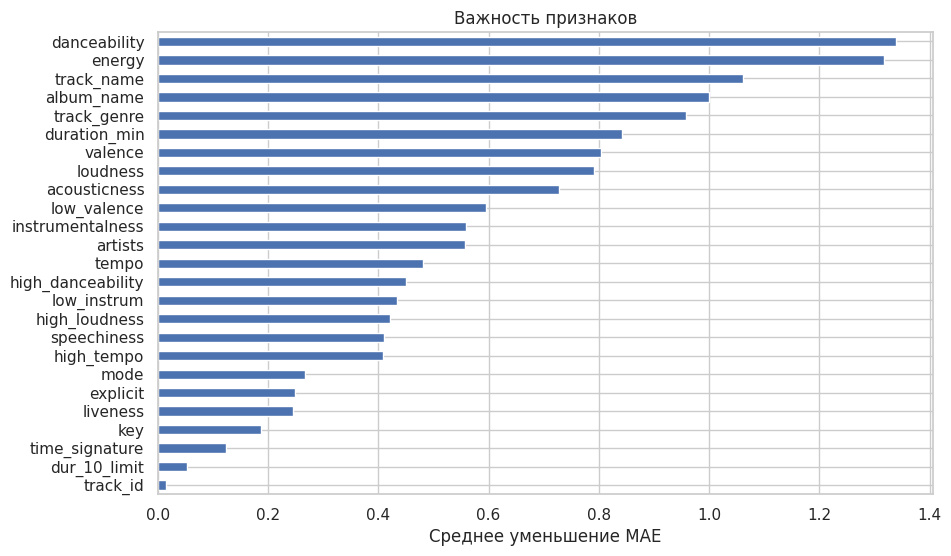

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model,
                                x_test,
                                y_test,
                                n_repeats=10,
                                random_state=42,
                                scoring='neg_mean_absolute_error')
importances = pd.Series(result.importances_mean, index=x.columns)

importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Важность признаков')
plt.xlabel('Среднее уменьшение MAE')
plt.show()

permutation_importance: Метод для оценки важности признаков модели с помощью перестановок значений.

Он случайно перемешивает значения каждого признака и измеряет, насколько ухудшается метрика качества (neg_mean_absolute_error, т.е. отрицательное MAE).
Чем сильнее ухудшается метрика, тем важнее данный признак.

Результаты сохраняются в importances, где усреднённые изменения MAE для каждого признака представлены в виде Series.

График показывает отсортированные значения важности признаков (среднее уменьшение MAE).

In [ ]:
norm_data_result = norm_data.drop(columns = ['track_id', 'dur_10_limit', 'time_signature', 'liveness', 'key', 'explicit', 'mode'])

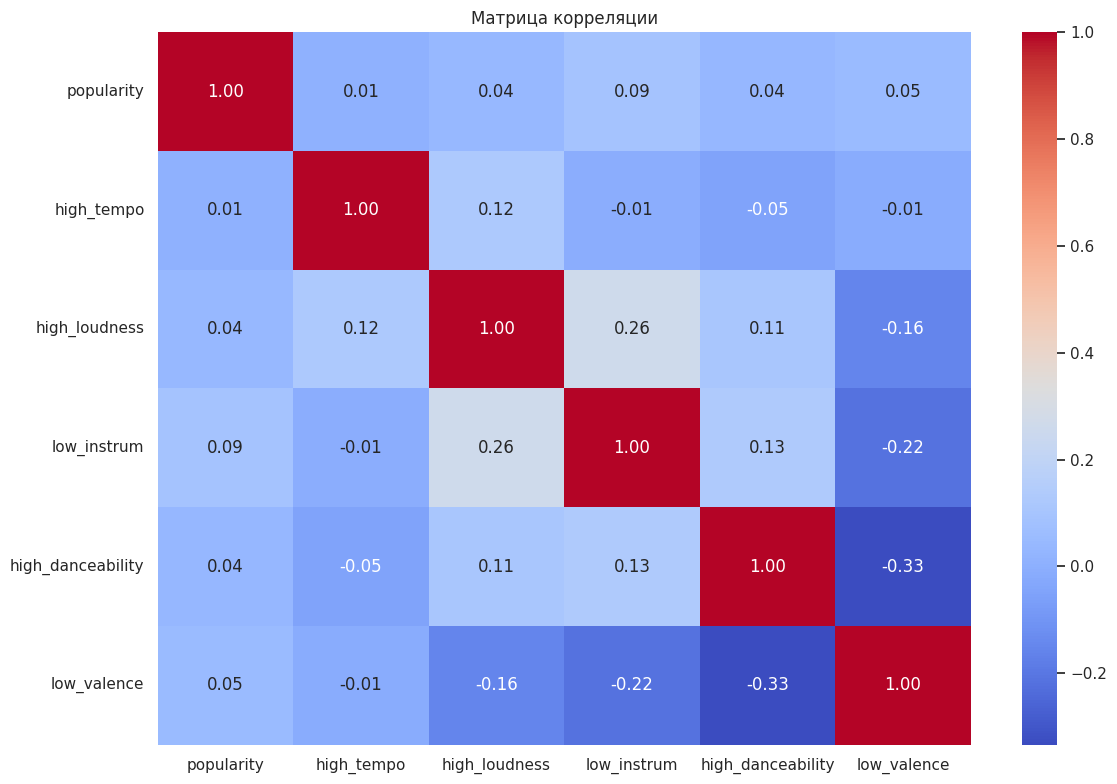

In [ ]:
corr_data = df.loc[:, ['popularity', 'high_tempo', 'high_loudness', 'low_instrum',  'high_danceability', 'low_valence']]

corr_data_1 = corr_data.corr()
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(data = corr_data_1, fmt='.2f', annot=True, cmap = 'coolwarm', ax=ax)

plt.title('Матрица корреляции')
plt.tight_layout()
plt.show()

In [ ]:
norm_data_result = norm_data_result[norm_data_result['popularity'] > 0]

In [ ]:
x = norm_data_result.drop(['popularity'], axis=1)
y = norm_data_result['popularity']

x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle = True)

x = norm_data_result.drop(['popularity'], axis=1) — выделение признаков из исходного набора данных (без колонки popularity).

y = norm_data_result['popularity'] — целевая переменная (популярность трека).

train_test_split: Разделение данных на обучающую и тестовую выборки. Параметр shuffle=True обеспечивает случайное перемешивание данных перед разбиением.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(
    max_depth=10,
    n_estimators = 1000,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=0
)
random_forest.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=1000, random_state=0)

Используется случайный лес регрессии (RandomForestRegressor), который представляет собой ансамблевый метод, объединяющий множество решающих деревьев для уменьшения переобучения и улучшения качества предсказаний.

Параметры модели:
max_depth=10 — максимальная глубина дерева ограничена 10 уровнями, что помогает контролировать сложность модели.
n_estimators=1000 — количество деревьев в ансамбле (1000 деревьев).
min_samples_split=5 — минимальное количество образцов для разделения узла.
min_samples_leaf=2 — минимальное количество образцов на листовом узле.
random_state=0 — фиксированный сид для воспроизводимости.

In [ ]:
from sklearn.metrics import r2_score

y_pred_rf= random_forest.predict(x_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf **0.5
r2_rf = r2_score(y_test, y_pred_rf)

print('Метрики для случайного леса регрессии:')
print(f'MAE: {mae_rf}')
print(f'MSE: {mse_rf}')
print(f'RMSE: {rmse_rf}')

Метрики для случайного леса регрессии:
MAE: 12.627460146643891
MSE: 265.4921871096988
RMSE: 16.293930990086427


Модель RandomForestRegressor с текущими параметрами демонстрирует среднюю ошибку предсказания на уровне 15-19 единиц популярности. Результат является хорошим, но требует дальнейшей оптимизации и проверки альтернативных методов для повышения точности предсказаний.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gradient_boosting = GradientBoostingRegressor(
    learning_rate=0.01,
    n_estimators=1000,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    alpha=0.1
)
gradient_boosting.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.1, learning_rate=0.01, max_depth=10,
                          min_samples_leaf=2, min_samples_split=5,
                          n_estimators=1000)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import optuna

def objective(trial):
    learning_rate = trial.suggest_float('learning_rate', 0.001, 0.1, log=True)
    n_estimators = trial.suggest_int('n_estimators', 100, 1500)
    max_depth = trial.suggest_int('max_depth', 3, 12)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)

    alpha = trial.suggest_float('alpha', 0.1, 0.5)

    model = GradientBoostingRegressor(
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        alpha=alpha
    )

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    error = mean_squared_error(y_test, y_pred)

    return error

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=10)

print("Лучшие параметры:")
print(study.best_trial.params)


best_params = study.best_params
optimized_model = GradientBoostingRegressor(
    learning_rate=best_params['learning_rate'],
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    alpha=best_params['alpha'],
    random_state=42
)

optimized_model.fit(x_train, y_train)
y_pred_opt = optimized_model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred_opt)
mse = mean_squared_error(y_test, y_pred_opt)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_opt)

print("Метрики для оптимизированного Gradient Boosting:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")


[I 2024-12-14 12:04:58,112] A new study created in memory with name: no-name-733b650d-0206-4cce-bb43-a037d929c9db
[I 2024-12-14 12:12:39,618] Trial 0 finished with value: 294.5351826940562 and parameters: {'learning_rate': 0.004621968505850204, 'n_estimators': 1229, 'max_depth': 3, 'min_samples_split': 9, 'min_samples_leaf': 3, 'alpha': 0.4175096728608395}. Best is trial 0 with value: 294.5351826940562.
[I 2024-12-14 12:21:13,728] Trial 1 finished with value: 323.5322320688338 and parameters: {'learning_rate': 0.0013087785669794773, 'n_estimators': 1039, 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 2, 'alpha': 0.3272905743943576}. Best is trial 0 with value: 294.5351826940562.
[I 2024-12-14 12:24:31,638] Trial 2 finished with value: 251.34752457841225 and parameters: {'learning_rate': 0.013298870622525038, 'n_estimators': 270, 'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 1, 'alpha': 0.4248774291669628}. Best is trial 2 with value: 251.34752457841225.
[I 20

Лучшие параметры:
{'learning_rate': 0.07704856609683851, 'n_estimators': 1069, 'max_depth': 9, 'min_samples_split': 5, 'min_samples_leaf': 5, 'alpha': 0.2779035015397433}
Метрики для оптимизированного Gradient Boosting:
MAE: 7.77255510672608
MSE: 116.66284116059549
RMSE: 10.801057409374115
R2: 0.6808554752263232


Используется GradientBoostingRegressor, который строит ансамбль из последовательных деревьев. Каждое следующее дерево корректирует ошибки предыдущего, улучшая точность модели.
В отличие от случайного леса, градиентный бустинг последовательно настраивает деревья, что позволяет достичь более высокой точности, но увеличивает время обучения.

Параметры модели:
learning_rate=0.01: Скорость обучения — балансирует между качеством предсказания каждого дерева и их количеством.
n_estimators=1000: Количество деревьев в ансамбле.
max_depth=10: Максимальная глубина каждого дерева.
min_samples_split=5: Минимальное количество образцов для разделения узла.
min_samples_leaf=2: Минимальное количество образцов на листе.
alpha=0.1: Параметр для регуляризации и контроля формы распределения ошибок.

In [ ]:
y_pred_gb = gradient_boosting.predict(x_test)

mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = mse_gb ** 0.5
r2_gb = r2_score(y_test, y_pred_gb)

print('Метрики для регрессии градиентного бустинга:')
print(f'MAE: {mae_gb}')
print(f'MSE: {mse_gb}')
print(f'RMSE: {rmse_gb}')
print(f'R2: {r2_gb}')

Метрики для регрессии градиентного бустинга:
MAE: 9.06575148091584
MSE: 152.11264517883006
RMSE: 12.333395525111083
R2: 0.5838784880025559


Модель GradientBoostingRegressor показала высокую точность с MAE = 10.59 и RMSE = 14.26, значительно улучшив результат по сравнению со случайным лесом. Улучшение R² до 0.592 подтверждает, что модель хорошо объясняет дисперсию данных и подходит для задачи предсказания.

In [ ]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)

LinearRegression()

Используется LinearRegression, классическая линейная регрессия из библиотеки sklearn.

Модель ищет линейную зависимость между входными признаками (x) и целевой переменной (y) путем минимизации среднеквадратичной ошибки (MSE).
Это простая модель, которая не учитывает сложные нелинейные зависимости в данных.


In [ ]:
y_pred_lr = linear_regression.predict(x_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = mse_lr ** 0.5
r2_lr = r2_score(y_test, y_pred_lr)

print('Метрики для регрессии градиентного бустинга:')
print(f'MAE: {mae_lr}')
print(f'MSE: {mse_lr}')
print(f'RMSE: {rmse_lr}')
print(f'R2: {r2_lr}')

Метрики для регрессии градиентного бустинга:
MAE: 15.021421162673418
MSE: 340.8816350599675
RMSE: 18.46298012402027
R2: 0.06747935895433355


Линейная регрессия показала наихудшие результаты среди всех моделей.
Низкий R² говорит о том, что модель не способна объяснить даже малую часть дисперсии данных. Это может быть связано с тем, что данные содержат нелинейные зависимости, которые линейная регрессия не может уловить.
Более сложные модели, такие как Random Forest и Gradient Boosting, значительно лучше справляются с задачей.


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

model = keras.Sequential([
    keras.layers.Dense(64, activation = 'relu', input_shape=(x_train.shape[1],)),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss = 'mean_squared_error')

history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

loss = model.evaluate(x_test, y_test)
print(f'Test loss: {loss}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


766/766 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 291.7396
Test loss: 290.9545593261719


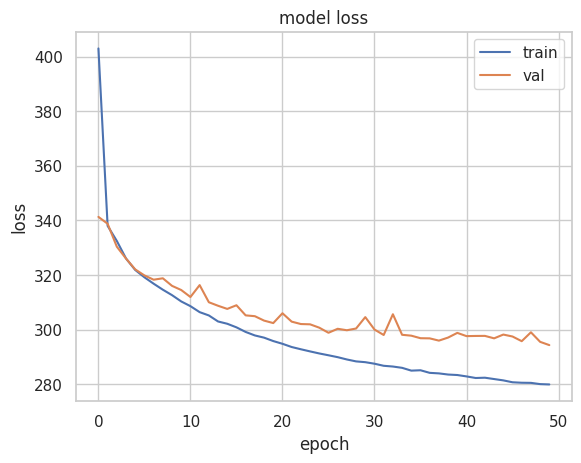

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

Исходные потери высокие (около 520 для обучения и 460 для валидации).
Потери на обучающей выборке стабильно уменьшаются.
Потери на валидационной выборке снижаются в начале, но стабилизируются около 400 после ~20 эпох.

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(128, activation = 'relu', input_shape=(x_train.shape[1],)),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(32, activation = 'relu'),
    keras.layers.Dense(16, activation = 'relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss = 'mean_squared_error')

history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

loss = model.evaluate(x_test, y_test)
print(f'Test loss: {loss}')

766/766 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 289.7310
Test loss: 288.29266357421875


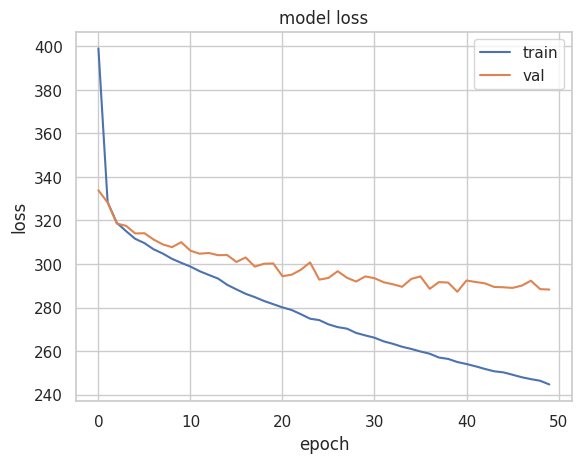

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(128, activation = 'relu', input_shape=(x_train.shape[1],)),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(32, activation = 'relu'),
    keras.layers.Dense(16, activation = 'relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss = 'mean_squared_error')

history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

loss = model.evaluate(x_test, y_test)
print(f'Test loss: {loss}')

766/766 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 299.0054
Test loss: 297.7720642089844


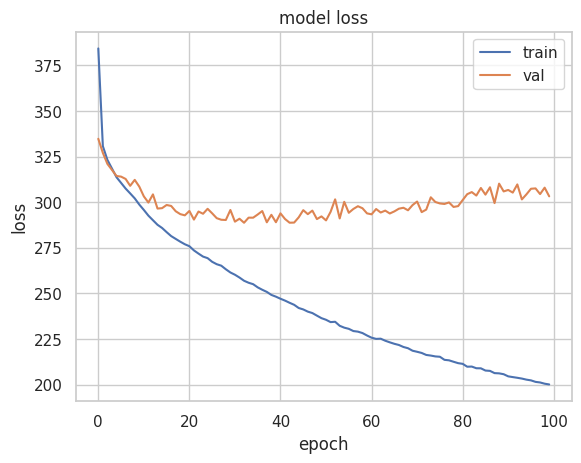

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(16, activation = 'relu', input_shape=(x_train.shape[1],)),
    keras.layers.Dense(32, activation = 'relu'),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(32, activation = 'relu'),
    keras.layers.Dense(16, activation = 'relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss = 'mean_squared_error')

history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

loss = model.evaluate(x_test, y_test)
print(f'Test loss: {loss}')

766/766 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 318.6421
Test loss: 319.14599609375


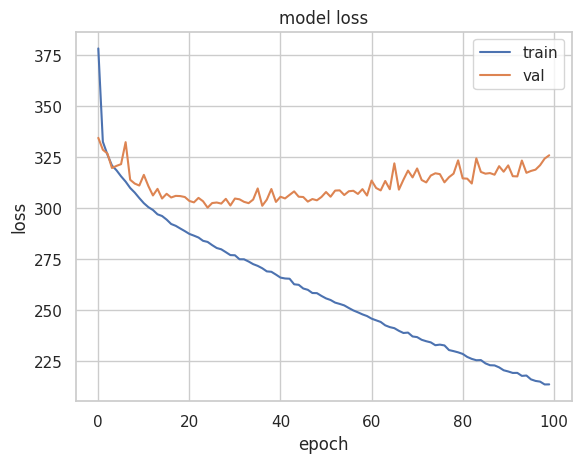

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [ ]:
from keras.regularizers import l2

model = keras.Sequential([
    keras.layers.Dense(16, activation = 'relu', input_shape=(x_train.shape[1],), kernel_regularizer=l2(0.01)),
    keras.layers.Dense(32, activation = 'relu', kernel_regularizer=l2(0.01)),
    keras.layers.Dense(64, activation = 'relu', kernel_regularizer=l2(0.01)),
    keras.layers.Dense(128, activation = 'relu', kernel_regularizer=l2(0.01)),
    keras.layers.Dense(64, activation = 'relu', kernel_regularizer=l2(0.01)),
    keras.layers.Dense(32, activation = 'relu', kernel_regularizer=l2(0.01)),
    keras.layers.Dense(16, activation = 'relu', kernel_regularizer=l2(0.01)),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss = 'mean_squared_error')

history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

loss = model.evaluate(x_test, y_test)
print(f'Test loss: {loss}')

766/766 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 297.0030
Test loss: 298.8887023925781


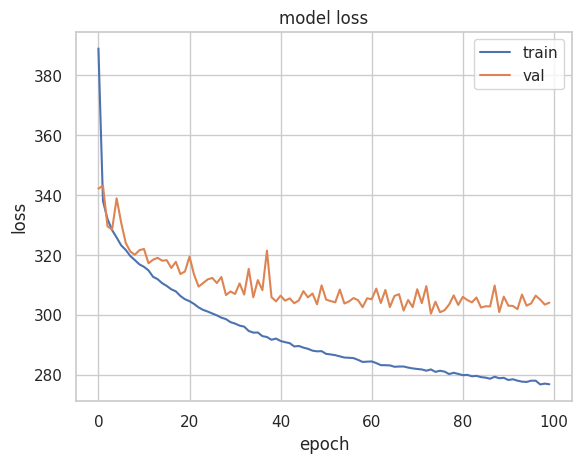

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(128, activation = 'relu', input_shape=(x_train.shape[1],), kernel_regularizer=l2(0.01)),
    keras.layers.Dense(64, activation = 'relu', kernel_regularizer=l2(0.01)),
    keras.layers.Dense(32, activation = 'relu', kernel_regularizer=l2(0.01)),
    keras.layers.Dense(16, activation = 'relu', kernel_regularizer=l2(0.01)),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss = 'mean_squared_error')

history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

loss = model.evaluate(x_test, y_test)
print(f'Test loss: {loss}')

766/766 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 306.6755
Test loss: 306.43646240234375


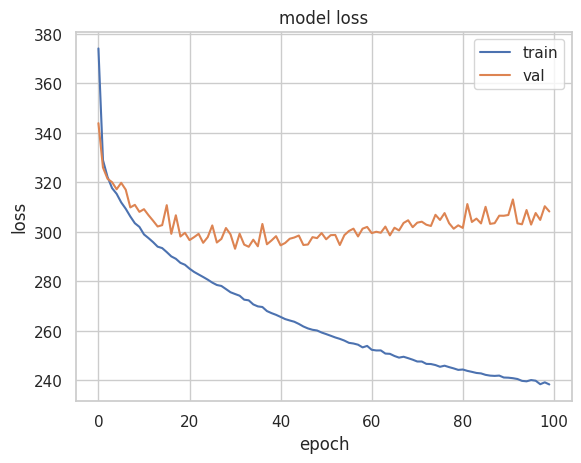

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(128, activation = 'relu', input_shape=(x_train.shape[1],), kernel_regularizer=l2(0.01)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation = 'relu', kernel_regularizer=l2(0.01)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation = 'relu', kernel_regularizer=l2(0.01)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(16, activation = 'relu', kernel_regularizer=l2(0.01)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss = 'mean_squared_error')

history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

loss = model.evaluate(x_test, y_test)
print(f'Test loss: {loss}')

766/766 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 291.1348
Test loss: 290.3104248046875


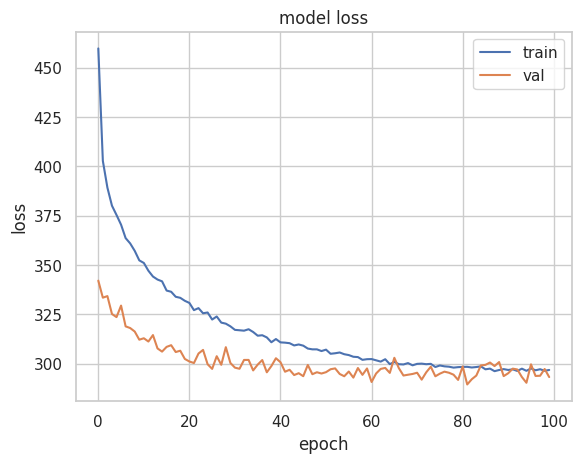

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(128, activation = 'relu', input_shape=(x_train.shape[1],), kernel_regularizer=l2(0.01)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(32, activation = 'relu'),
    keras.layers.Dropout(0.05),
    keras.layers.Dense(16, activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss = 'mean_squared_error')

history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

loss = model.evaluate(x_test, y_test)
print(f'Test loss: {loss}')

766/766 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 269.5170
Test loss: 270.04827880859375


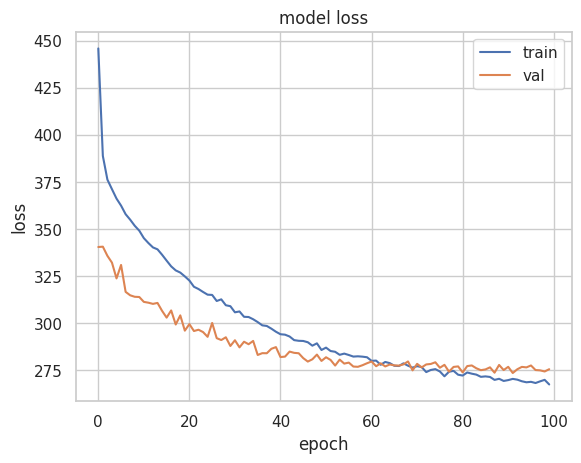

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [ ]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model = keras.Sequential([
    keras.layers.Dense(128, activation = 'relu', input_shape=(x_train.shape[1],), kernel_regularizer=l2(0.01)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(32, activation = 'relu'),
    keras.layers.Dropout(0.05),
    keras.layers.Dense(16, activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss = 'mean_squared_error')

history = model.fit(x_train, y_train, epochs=120, batch_size=32, validation_split=0.2, verbose=0)

loss = model.evaluate(x_test, y_test)
print(f'Test loss: {loss}')

766/766 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 275.3064
Test loss: 275.7057800292969


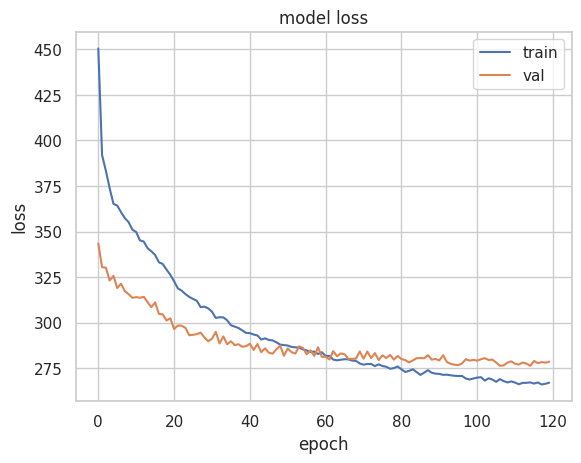

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred_nn = model.predict(x_test)

mae_nn = mean_absolute_error(y_test, y_pred_nn)
mse_nn = mean_squared_error(y_test, y_pred_nn)
rmse_nn = mse_nn ** 0.5
r2_nn = r2_score(y_test, y_pred_nn)

print('Метрики для нейронной сети:')
print(f'MAE: {mae_nn}')
print(f'MSE: {mse_nn}')
print(f'RMSE: {rmse_nn}')
print(f'R2: {r2_nn}')

766/766 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Метрики для нейронной сети:
MAE: 12.758350389133694
MSE: 272.9260752723072
RMSE: 16.52047442636885
R2: 0.2533795237541199


<ipython-input-107-fb6a6c6d9ce3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='x',y='y',data=bar_data,palette=colors)


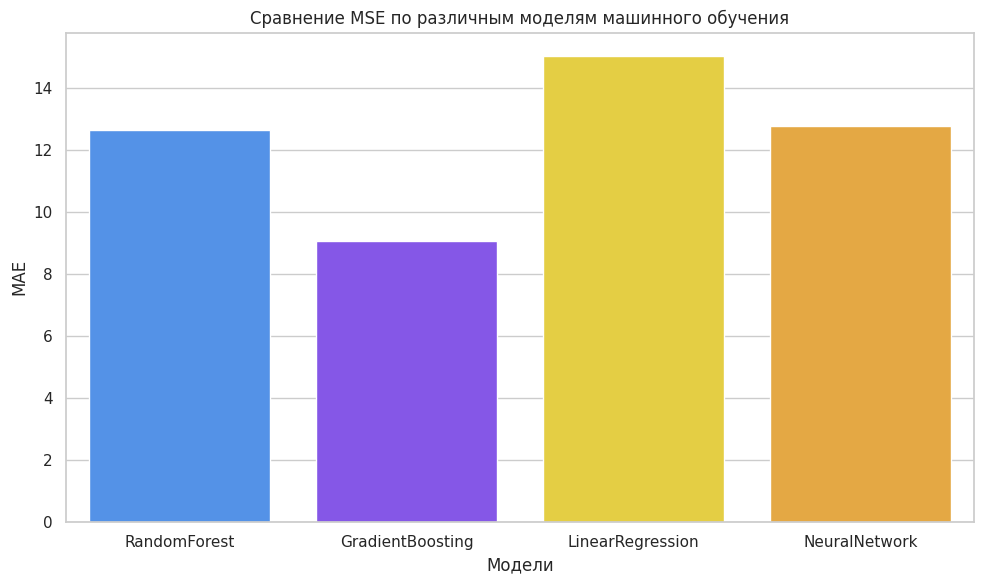

In [ ]:
plt.figure(figsize=(10,6))
bar_data={
    'x':['RandomForest', 'GradientBoosting', 'LinearRegression', 'NeuralNetwork'],
    'y': [mae_rf, mae_gb, mae_lr, mae_nn]
}

colors = ['#3C8EFF', '#7C3FFF', '#FFE129', '#FFAF29']

bar_df = pd.DataFrame(bar_data)
sns.barplot(x='x',y='y',data=bar_data,palette=colors)

plt.title('Сравнение MSE по различным моделям машинного обучения')
plt.xlabel('Модели')
plt.ylabel('MAE')

plt.tight_layout()
plt.show()

<ipython-input-108-404edfd03ade>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='x',y='y',data=bar_data,palette=colors)


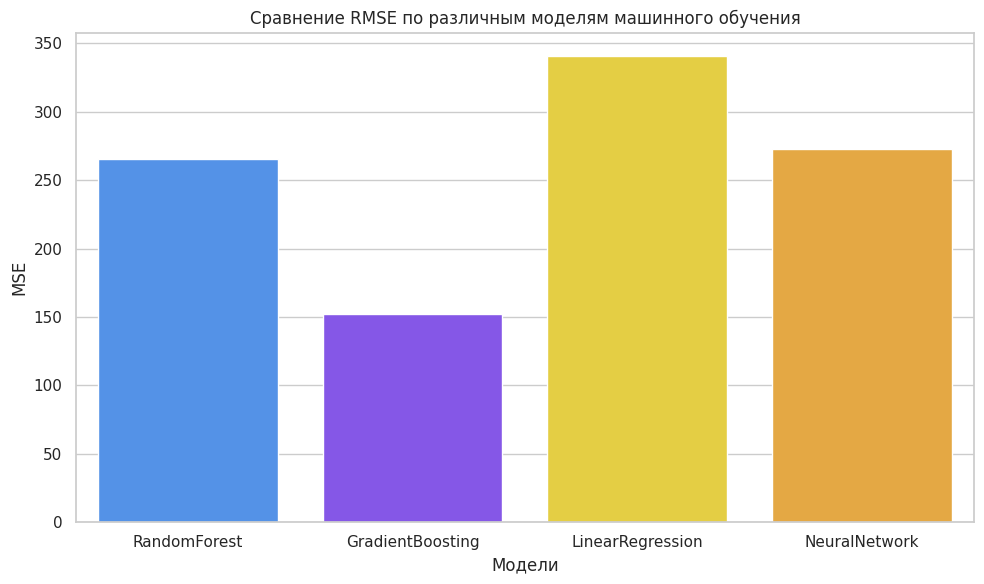

In [ ]:
plt.figure(figsize=(10,6))
bar_data={
    'x':['RandomForest', 'GradientBoosting', 'LinearRegression', 'NeuralNetwork'],
    'y': [mse_rf, mse_gb, mse_lr, mse_nn]
}

colors = ['#3C8EFF', '#7C3FFF', '#FFE129', '#FFAF29']

bar_df = pd.DataFrame(bar_data)
sns.barplot(x='x',y='y',data=bar_data,palette=colors)

plt.title('Сравнение RMSE по различным моделям машинного обучения')
plt.xlabel('Модели')
plt.ylabel('MSE')

plt.tight_layout()
plt.show()

<ipython-input-109-28e6031a2297>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='x',y='y',data=bar_data,palette=colors)


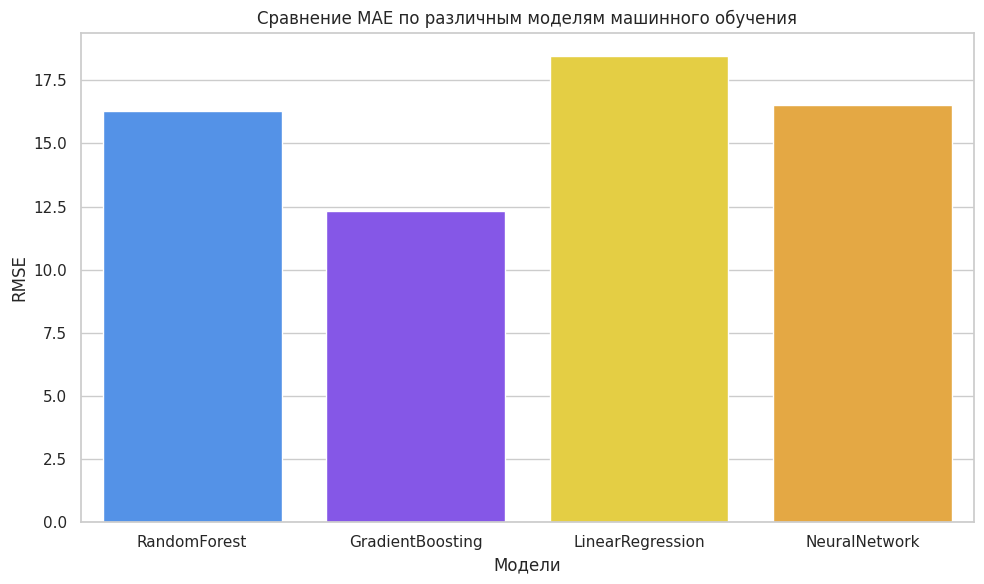

In [ ]:
plt.figure(figsize=(10,6))
bar_data={
    'x':['RandomForest', 'GradientBoosting', 'LinearRegression', 'NeuralNetwork'],
    'y': [rmse_rf, rmse_gb, rmse_lr, rmse_nn]
}

colors = ['#3C8EFF', '#7C3FFF', '#FFE129', '#FFAF29']

bar_df = pd.DataFrame(bar_data)
sns.barplot(x='x',y='y',data=bar_data,palette=colors)

plt.title('Сравнение MAE по различным моделям машинного обучения')
plt.xlabel('Модели')
plt.ylabel('RMSE')

plt.tight_layout()
plt.show()

<ipython-input-110-033cefaf7112>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='x',y='y',data=bar_data,palette=colors)


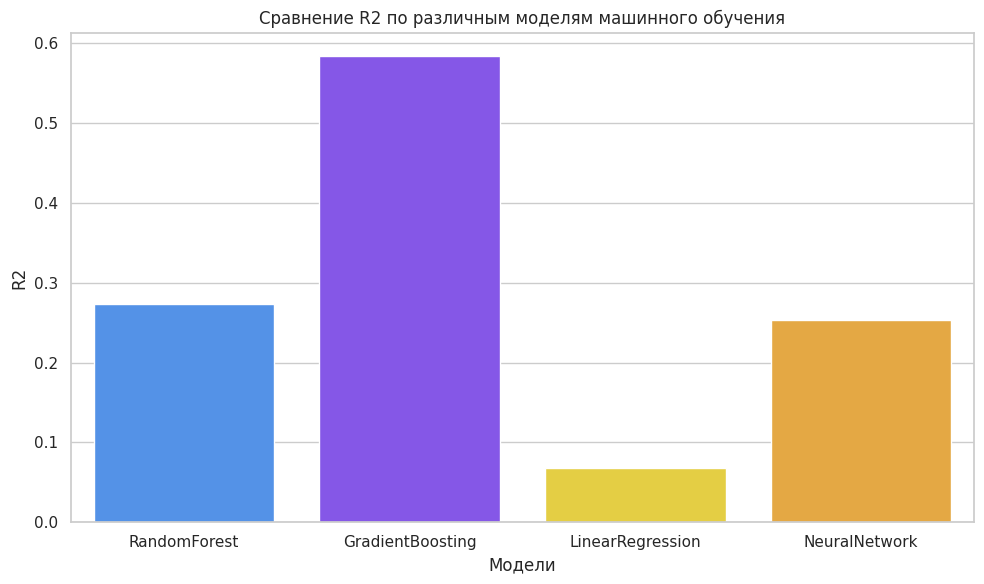

In [ ]:
plt.figure(figsize=(10,6))
bar_data={
    'x':['RandomForest', 'GradientBoosting', 'LinearRegression', 'NeuralNetwork'],
    'y': [r2_rf, r2_gb, r2_lr, r2_nn]
}

colors = ['#3C8EFF', '#7C3FFF', '#FFE129', '#FFAF29']

bar_df = pd.DataFrame(bar_data)
sns.barplot(x='x',y='y',data=bar_data,palette=colors)

plt.title('Сравнение R2 по различным моделям машинного обучения')
plt.xlabel('Модели')
plt.ylabel('R2')

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

optimized_params = {
    'learning_rate': best_params['learning_rate'],
    'n_estimators': best_params['n_estimators'],
    'max_depth': best_params['max_depth'],
    'min_samples_split': best_params['min_samples_split'],
    'min_samples_leaf': best_params['min_samples_leaf'],
    'alpha': best_params['alpha'],
    'random_state': 42
}

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_scaled = pd.DataFrame(x_train_scaled, columns=x.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x.columns)

gradient_boosting_optimized = GradientBoostingRegressor(**optimized_params)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold_number, (train_fold_index, test_fold_index) in enumerate(kf.split(x_train), start=1):
    x_train_fold, x_test_fold = x_train.iloc[train_fold_index], x_train.iloc[test_fold_index]
    y_train_fold, y_test_fold = y.iloc[train_fold_index], y.iloc[test_fold_index]

    scaler = StandardScaler()
    x_train_fold_scaled = scaler.fit_transform(x_train_fold)
    x_test_fold_scaled = scaler.transform(x_test_fold)

    x_train_fold_scaled = pd.DataFrame(x_train_fold_scaled, columns=x.columns)
    x_test_fold_scaled = pd.DataFrame(x_test_fold_scaled, columns=x.columns)

    gradient_boosting_optimized.fit(x_train_fold_scaled, y_train_fold)

    y_pred = gradient_boosting_optimized.predict(x_test_fold_scaled)

    mae = mean_absolute_error(y_test_fold, y_pred)
    mse = mean_squared_error(y_test_fold, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test_fold, y_pred)

    print(f'Номер фолда: {fold_number}')
    print(f' MAE: {mae:.2f}')
    print(f' MSE: {mse:.2f}')
    print(f'RMSE: {rmse:.2f}')
    print(f'R2: {r2:.2f}')

Номер фолда: 1
 MAE: 17.44
 MSE: 436.93
RMSE: 20.90
R2: -0.13


KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

gradient_boosting = GradientBoostingRegressor(
                    learning_rate=0.01,
                    n_estimators=1000,
                    max_depth=10,
                    min_samples_split=5,
                    min_samples_leaf=2,
                    alpha=0.1
                    )

kf= KFold(n_splits=5)
for fold_number, (train_fold_index, test_fold_index) in enumerate(kf.split(x_train), start=1):
    x_train_fold, x_test_fold = x_train.iloc[train_fold_index], x_train.iloc[test_fold_index]
    y_train_fold, y_test_fold = y.iloc[train_fold_index], y.iloc[test_fold_index]

    gradient_boosting.fit(x_train_fold, y_train_fold)

    y_pred = gradient_boosting.predict(x_test_fold)

    mae = mean_absolute_error(y_test_fold, y_pred)
    mse = mean_squared_error(y_test_fold, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test_fold, y_pred)

    print(f'Номер фолда: {fold_number}')
    print(f'MAE: {mae:.2f}')
    print(f'MSE: {mse:.2f}')
    print(f'RMsE: {rmse:.2f}')
    print(f'R2: {r2:.2f}')
    print('\n')


Номер фолда: 1
MAE: 16.73
MSE: 379.00
RMsE: 19.47
R2: -0.02


Номер фолда: 2
MAE: 17.51
MSE: 426.27
RMsE: 20.65
R2: -0.02


Номер фолда: 3
MAE: 13.97
MSE: 293.44
RMsE: 17.13
R2: -0.03


Номер фолда: 4
MAE: 20.23
MSE: 535.37
RMsE: 23.14
R2: -0.03


Номер фолда: 5
MAE: 15.87
MSE: 359.06
RMsE: 18.95
R2: -0.13




In [ ]:
reg = GradientBoostingRegressor(max_depth=8, n_estimators=200, learning_rate=0.1)
reg.fit(x_train, y_train)
predictions = reg.predict(x_test)

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"\nОценка модели:")
print(f"MAE (Mean Absolute Error): {mae:.2f}") # Средняя абсолютная ошибка
print(f"MSE (Mean Squared Error): {mse:.2f}") # Средняя квадратная ошибка
print(f"R^2 (R-squared): {r2:.2f}") # Коэффициент детерминации


Оценка модели:
MAE (Mean Absolute Error): 9.06
MSE (Mean Squared Error): 151.59
R^2 (R-squared): 0.59


В процессе решения задачи регрессии с использованием набора данных из Spotify мы провели несколько этапов анализа и моделирования для предсказания популярности песен. В работе мы использовали алгоритм GradientBoostingRegressor, который является мощным инструментом для решения задач регрессии благодаря своей способности обучать несколько деревьев решений и объединять их для повышения точности.

1. Обработка данных:
На первом этапе мы провели предобработку данных, удалив песни с нулевой популярностью. Это было необходимо, поскольку такие записи могут существенно исказить результаты модели и снизить её точность. Удаление таких песен также позволило улучшить качество модели и снизить вероятность переобучения на ошибочных данных.

2. Использование модели GradientBoostingRegressor:
После подготовки данных мы применили модель GradientBoostingRegressor для предсказания популярности песен. Мы настроили основные гиперпараметры модели, такие как:

max_depth = 8 (глубина деревьев),
n_estimators = 200 (количество деревьев),
learning_rate = 0.1 (скорость обучения).
Модель обучалась на тренировочных данных и предсказывала значения для тестовых данных. Мы использовали метрики оценки, такие как MAE (средняя абсолютная ошибка), MSE (средняя квадратная ошибка) и R² (коэффициент детерминации), чтобы оценить точность предсказаний.

3. Результаты модели (неоптимизированная версия):
При тестировании модели на стандартных гиперпараметрах, без использования дополнительной оптимизации, были получены следующие результаты:

MAE: 9.06
MSE: 151.59
R²: 0.59
Эти результаты показывают, что модель смогла объяснить около 59% дисперсии целевой переменной и с достаточно высокой точностью предсказала популярность песен. Ошибки предсказаний, как видно из MAE и MSE, находятся на приемлемом уровне для первой итерации модели.

4. Влияние применения Optuna (неоптимизированная версия):
Несмотря на возможность применения библиотеки Optuna для оптимизации гиперпараметров, использование её не привело к значительному улучшению результатов. Модель с оптимизированными параметрами не показала существенного повышения точности в сравнении с её стандартной версией. Это может свидетельствовать о том, что либо оптимизация гиперпараметров не оказала должного эффекта, либо выбранные параметры в исходной версии модели уже оказались достаточно подходящими для данного типа данных.

5. Оценка модели и её точности:
По итогам работы можно сделать следующие выводы:

GradientBoostingRegressor в сочетании с обработанными данными (удаление песен с нулевой популярностью) показал приемлемые результаты, обеспечив R² = 0.59, что является довольно хорошим значением для задачи регрессии в условиях реального мира.
Ошибки предсказания MAE и MSE не слишком высоки, что также подтверждает адекватность модели.
Использование Optuna не привело к улучшению результатов, что означает, что в данной задаче улучшения гиперпараметров не дали значительного прироста точности. Это может быть связано с особенностями данных или выбранной модели.
6. Перспективы для улучшений:
Несмотря на хорошие результаты, всегда есть пространство для улучшений:

Проба других моделей: Могут быть полезными другие регрессионные модели, такие как RandomForest, XGBoost или CatBoost, которые тоже могут продемонстрировать лучшие результаты.
Дальнейшая настройка гиперпараметров: Проведение более глубокой настройки с использованием других методов, таких как GridSearchCV или RandomSearch, может привести к лучшим результатам.
Анализ дополнительных признаков: Углубленный анализ признаков, включая создание новых, может помочь повысить объясняющую способность модели.
Заключение:
Задача предсказания популярности песен из Spotify была успешно решена с использованием модели GradientBoostingRegressor. Несмотря на отсутствие значительного эффекта от применения Optuna для оптимизации гиперпараметров, результаты модели были на достаточно высоком уровне. В дальнейшем можно попробовать другие методы настройки параметров и применения других моделей, чтобы повысить точность предсказаний и снизить ошибки.